In [79]:
# import required python plugins and load the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
loan_df = pd.read_excel('loan.xlsx')

In [80]:
loan_df.shape

(39717, 111)

In [81]:
### DELETING UNNECESSARY COLUMNS

In [82]:
# Create a to_drop list with unneeded columns for analysis
# get all columns as a list and go through all columns and check for mean percentages of null values in those columns
# if mean percentage of null values is greater than 30 then add to to_drop list
columns = loan_df.columns.to_list()
to_drop = ['id', 'member_id', 'emp_title', 'title', 'url', 'zip_code', 'funded_amnt', 'funded_amnt_inv', 'earliest_cr_line', 'inq_last_6mths', 
           'open_acc', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
           'collection_recovery_fee', 'revol_bal', 'total_pymnt_inv', 'last_pymnt_d', 'last_pymnt_amnt', 'sub_grade'
          ]
for x in columns:
    mean_x = loan_df[x].isnull().mean()*100
    if mean_x > 30.0: # all the columns where mean percentage of null values is greater than 30
        to_drop.append(x)
    if loan_df[x].nunique() == 1: #all the columns with single unique values
        to_drop.append(x)

In [83]:
## remove all the columns in to_drop list
for x in to_drop:
    loan_df = loan_df.drop(x, axis=1)

In [84]:
loan_df.shape

(39717, 20)

In [85]:
# derive loan_issued_age and credit_pull_age from the dates available
from datetime import date
    
loan_df['loan_issued_age'] = date.today().year-pd.to_datetime(loan_df['issue_d']).dt.year
loan_df['credit_pull_age'] = date.today().year-pd.to_datetime(loan_df['last_credit_pull_d']).dt.year

# drop the issue_d and last_credit_pull_d from the data
loan_df = loan_df.drop(['issue_d', 'last_credit_pull_d'], axis=1)
loan_df.shape

(39717, 20)

In [86]:
loan_df.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  39717.000000  39717.000000  39717.000000  3.971700e+04  39717.000000   
mean   11219.443815      0.120212    324.561922  6.896893e+04     13.315130   
std     7456.670694      0.037248    208.874874  6.379377e+04      6.678594   
min      500.000000      0.054200     15.690000  4.000000e+03      0.000000   
25%     5500.000000      0.092500    167.020000  4.040400e+04      8.170000   
50%    10000.000000      0.118600    280.220000  5.900000e+04     13.400000   
75%    15000.000000      0.145900    430.780000  8.230000e+04     18.600000   
max    35000.000000      0.245900   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs       pub_rec    revol_util   total_pymnt  \
count  39717.000000  39717.000000  39667.000000  39717.000000   
mean       0.146512      0.055065      0.488322  12153.596544   
std        0.491812      0.237200      0.283326   9042.040766   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.254000   5576.930000   
50%        0.000000      0.000000      0.493000   9899.640319   
75%        0.000000      0.000000      0.724000  16534.433040   
max       11.000000      4.000000      0.999000  58563.679930   

       pub_rec_bankruptcies  loan_issued_age  credit_pull_age  
count          39020.000000     39717.000000     39715.000000  
mean               0.043260        12.671098         8.714994  
std                0.204324         0.877514         1.791542  
min                0.000000        12.000000         7.000000  
25%                0.000000        12.000000         7.000000  
50%                0.000000        12.000000         8.000000  
75%                0.000000        13.000000        10.000000  
max                2.000000        16.000000        16.000000

In [87]:
# from the describe command we figured that delinq_2yrs, pub_rec and pub_rec_bankruptcies record have no data till 75%. Hence we can drop those columns

loan_df = loan_df.drop(['delinq_2yrs', 'pub_rec', 'pub_rec_bankruptcies'], axis=1)
loan_df.shape

(39717, 17)

In [88]:
### DELETING/IMPUTING UNNECESSARY ROWS

In [89]:
## find the columns with mean percentage of null values not 0
loan_df.isnull().mean()*100

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
revol_util             0.125891
total_pymnt            0.000000
loan_issued_age        0.000000
credit_pull_age        0.005036
dtype: float64

In [90]:
## IMPUTING THE ROWS FOR NUMERICAL COLUMNS
# 1. emp_length
## filling null values with the mode for emp_length column
emp_length_mode = loan_df['emp_length'].mode()[0]
loan_df['emp_length'] = loan_df['emp_length'].fillna(emp_length_mode)

# 2. revol_util
## filling null values with the median for revol_util column
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: float(str(x).replace('%', "")) if x else x)
revol_util_median = loan_df['revol_util'].median()
loan_df['revol_util'] = loan_df['revol_util'].fillna(revol_util_median)

# 3. credit_pull_age
## delete the rows where credit_pull_age is null. Because the percentage of null values here is < 1 and this field cant be imputed with some data.
loan_df = loan_df[loan_df['credit_pull_age'].notnull()]


In [91]:
## find the value_counts and print rows to remove unnecessary rows;

for x in loan_df.columns.to_list():
    print(loan_df[x].value_counts())

loan_amnt
10000    2833
12000    2334
5000     2050
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: count, Length: 885, dtype: int64
term
 36 months    29094
 60 months    10621
Name: count, dtype: int64
int_rate
0.1099    956
0.1349    826
0.1149    825
0.0751    787
0.0788    725
         ... 
0.1836      1
0.1696      1
0.1615      1
0.1601      1
0.1744      1
Name: count, Length: 371, dtype: int64
installment
311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: count, Length: 15383, dtype: int64
grade
B    12019
A    10084
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64
emp_length
10+ years    9954
< 1 year     4582
2 years      4388
3 years      4095
4 years      3436
5 years      3281
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258

In [92]:
##### Remove rows with unneeded redults from the above
### 1. purpose
## remove rows with purpose as other as we dont know what is other
loan_df = loan_df[loan_df['purpose'] != 'other']

### 2. home_ownership
## remove rows with home_ownership as OTHER, NONE
loan_df = loan_df[loan_df['home_ownership'].isin(['OWN', 'RENT', 'MORTGAGE'])]


In [93]:
# classify numerical and categorical columns based on type of values. If the type of unique values is numeric then put them under numeric otherwise categorical
import numpy as np
categorical = loan_df.select_dtypes(include=['object']).columns.tolist()
numerical = loan_df.select_dtypes(include=np.number).columns.tolist()

print('categorical == ', categorical)
print('numerical == ', numerical)

categorical ==  ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']
numerical ==  ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'total_pymnt', 'loan_issued_age', 'credit_pull_age']


In [94]:
### UNIVARIATE ANALYSIS

In [95]:
### analyze only the data for which loan_status is CHARGED OFF in Univariate analysis
defaulters = loan_df[loan_df['loan_status'].apply(lambda x: x in ['Charged Off'])]
loan_df.shape

(35637, 17)

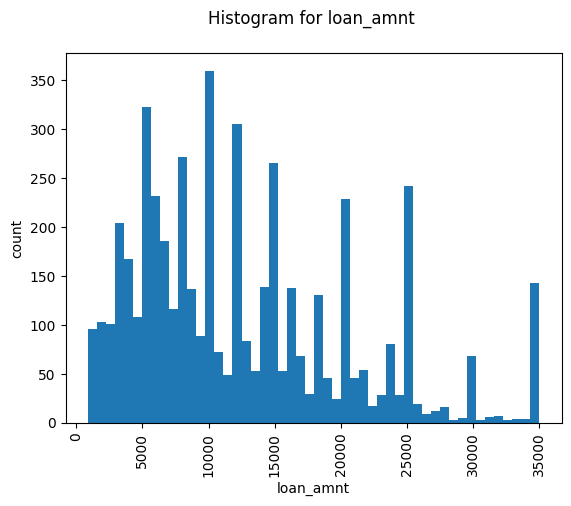

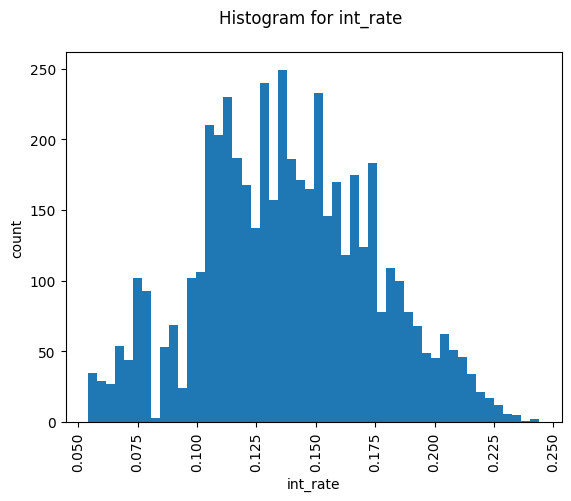

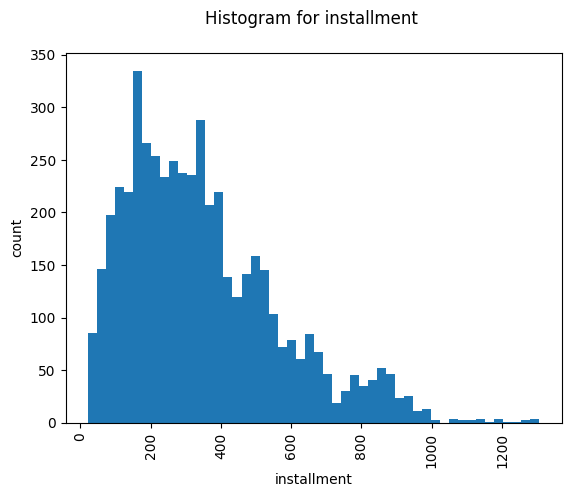

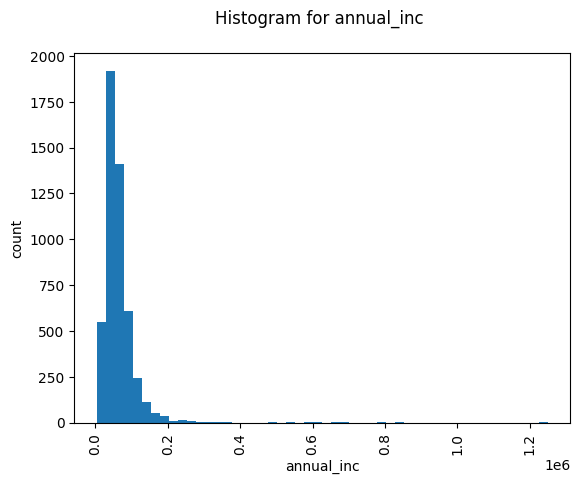

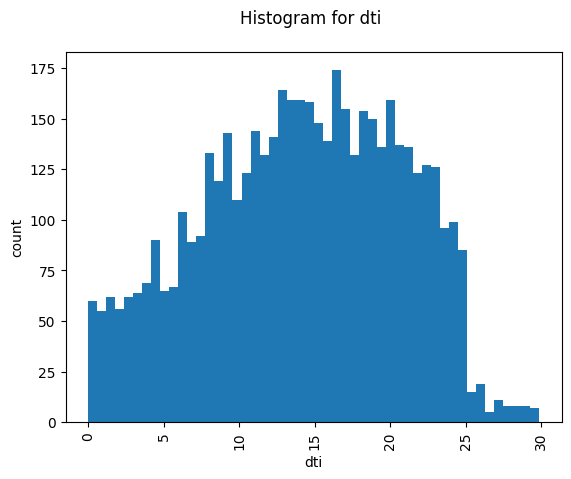

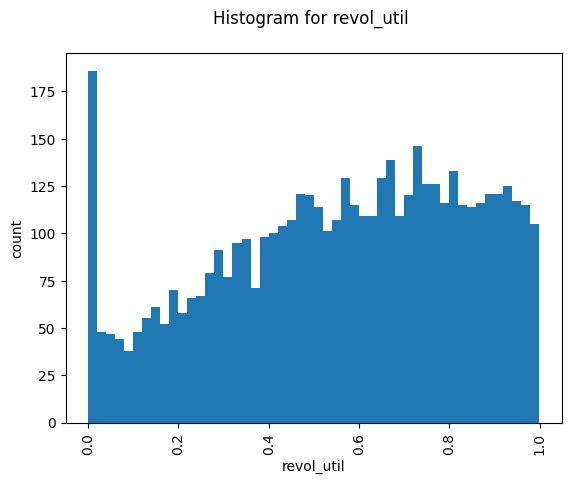

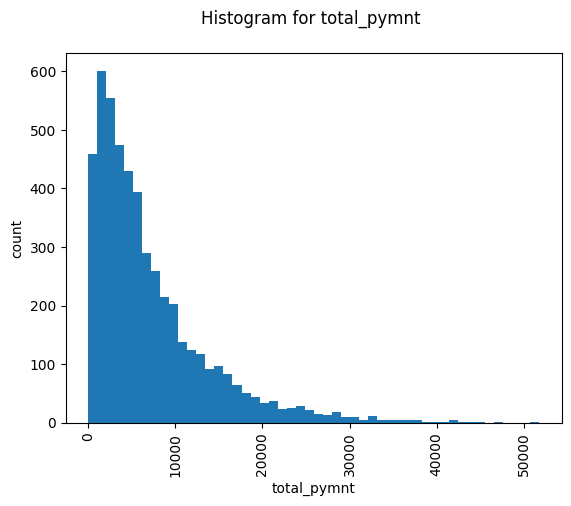

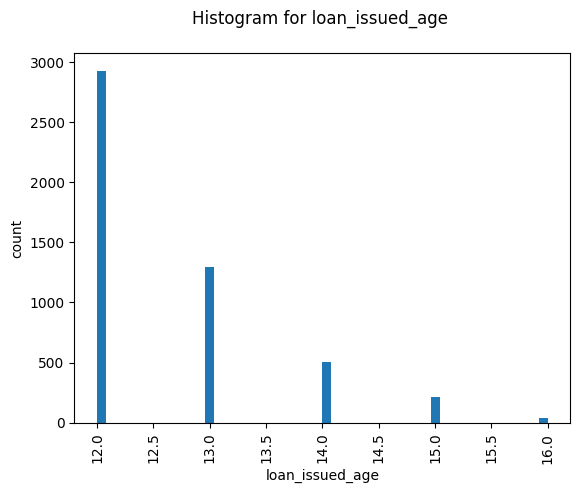

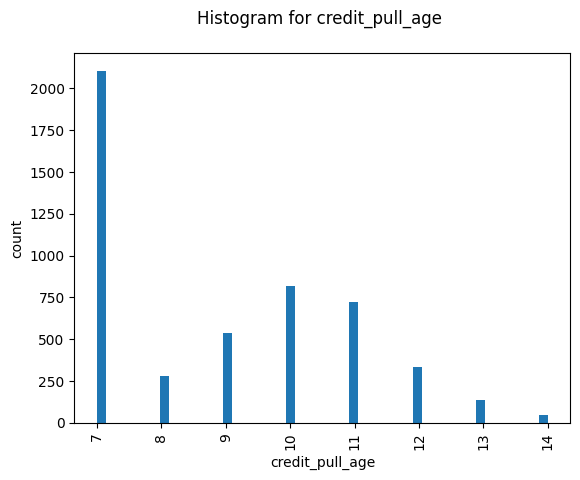

In [96]:
## NUMERICAL
for x in numerical:
    plt.hist(defaulters[x], bins=50)
    plt.xticks(rotation=90)
    plt.xlabel(x)
    plt.ylabel('count')
    plt.title('Histogram for '+x+' \n')
    plt.show()

In [97]:
### UNIVARIATE ANALYSIS
### Annual Increment - annual_inc : Majority of defaulters who have taken loan had an annual increment between 0 to 1 lakh
### Interest Rate: Majority of defaulters have taken interest rate between 10% to 17%
### Debt payments to Debt obligations ratio: dti : Majority of defaulters who have taken loan have dti between 10 and 25
### Credit pull age: The last credit data pulled for majority of defaulters is 7 years ago

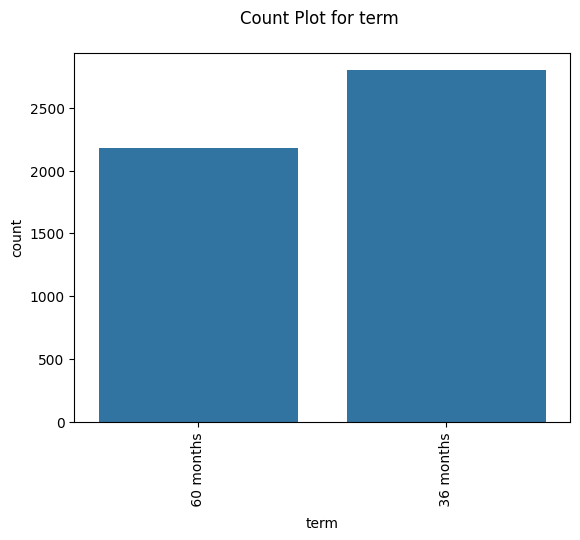

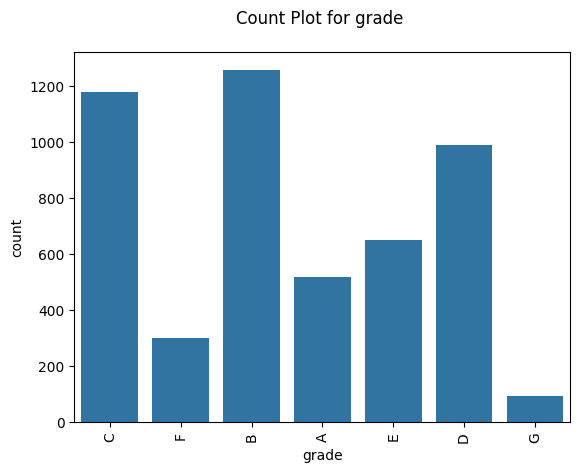

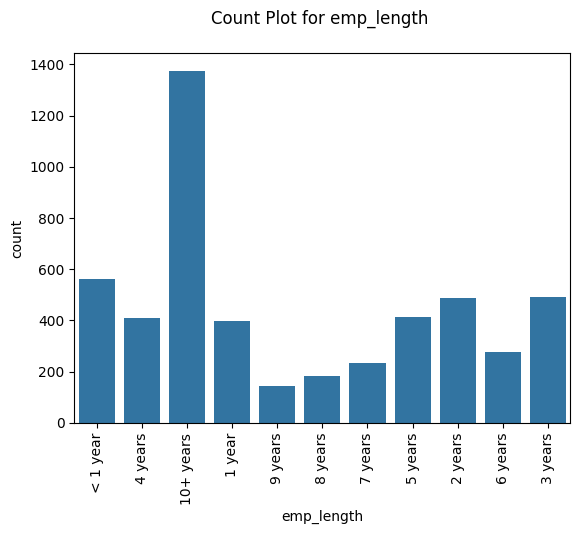

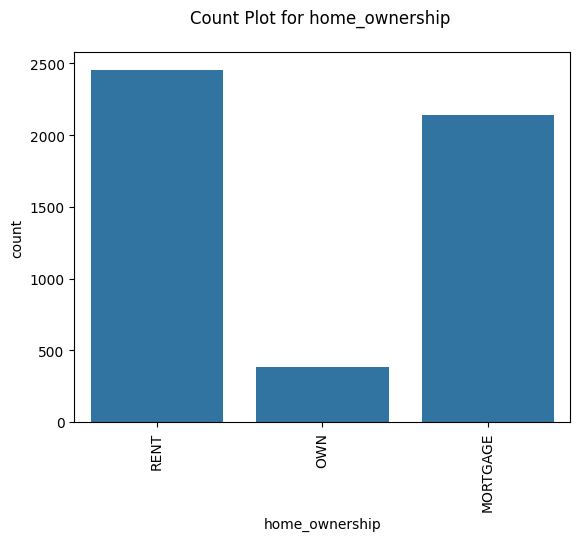

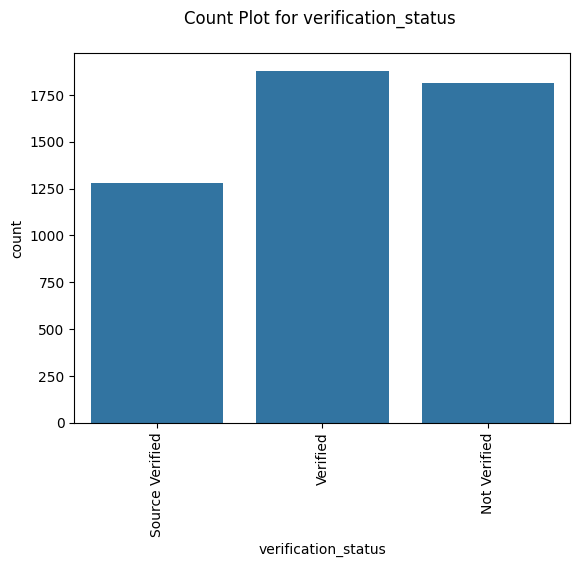

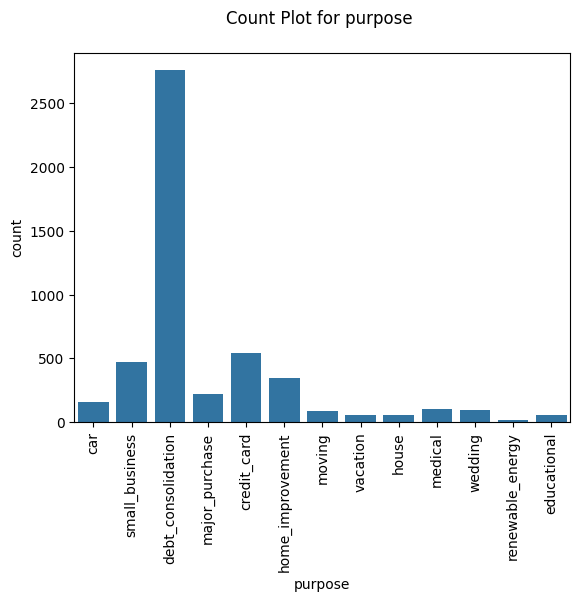

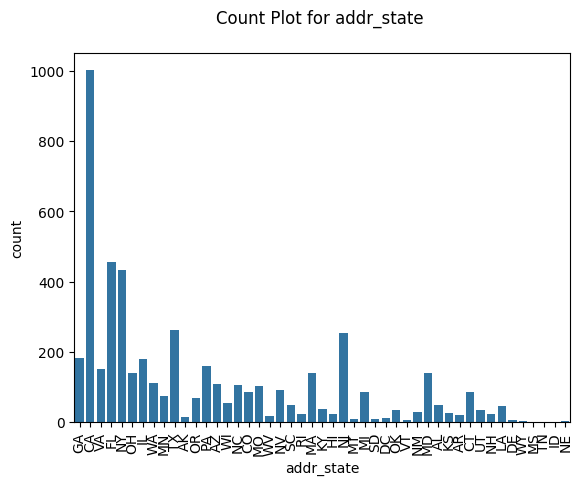

In [98]:
## CATEGORICAL
for x in categorical:
    if x != 'loan_status':
        sns.countplot(x = x, data = defaulters)
        plt.title('Count Plot for '+x+' \n')
        plt.xlabel(x)
        plt.ylabel('count')
        plt.xticks(rotation=90)
        plt.show()

In [99]:
### ANALYSIS
    
### term: Majority of people who have defaulted took it for a term of 36 months
### grade: Least number of people defaulted in grade G
### employee_length :  Majority of people who have defaulted fall with employment duration of 10+years.
### home_ownership : Least number of people who have defaulted are home owners. Most are Renters
### purpose : Majority of people who defaulted have purpose as debt_consolidation
### state: Majority of people who defaulted are from the state of CA


In [100]:
#### SEGMENTED ANALYSIS

# we will analyze only the data with loan status as fully paid and charged off
loan_df = loan_df[loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [101]:
# Calculate the percentage of people who have defaulted in each categorical variable.
for x in categorical:
    if x != 'loan_status':
        f = loan_df.groupby(x)['loan_status'].count()
        d = defaulters.groupby(x)['loan_status'].count()
        print(d/f*100)

term
 36 months    10.810915
 60 months    24.905747
Name: loan_status, dtype: float64
grade
A     5.781704
B    11.992743
C    16.833524
D    21.551536
E    26.459780
F    33.111111
G    32.857143
Name: loan_status, dtype: float64
emp_length
1 year       14.229532
10+ years    16.117688
2 years      12.688900
3 years      13.533627
4 years      13.538563
5 years      14.335180
6 years      14.019163
7 years      15.190692
8 years      14.110429
9 years      13.039568
< 1 year     14.109658
Name: loan_status, dtype: float64
home_ownership
MORTGAGE    13.705649
OWN         14.691216
RENT        14.959766
Name: loan_status, dtype: float64
verification_status
Not Verified       12.426440
Source Verified    14.624686
Verified           16.709649
Name: loan_status, dtype: float64
purpose
car                   10.621242
credit_card           10.765550
debt_consolidation    15.321417
educational           17.391304
home_improvement      12.055749
house                 16.120219
major_purchase

In [102]:

### ANALYSIS
# Percentage of people who defaulted in 60 months term is 25% compared to 36 month term which is 10.8%
# Percentage of people who defaulted in Grades F and G is higher and grade A is the lowest
# Percentage of defaulters is higher in people who took loan for small business.
# Percentage of defaulters is higher in state NE compared to others.

In [103]:
# Calculate the percentage of loan amount defaulted
amnt = loan_df.groupby('loan_status')['loan_amnt'].sum()
print('Loan Amount == ', (amnt[0]/(amnt[0]+amnt[1]))*100)

Loan Amount ==  15.87771431243607


/tmp/ipykernel_10330/185921385.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Loan Amount == ', (amnt[0]/(amnt[0]+amnt[1]))*100)


In [104]:
### ANALYSIS
# Around 16% of total loan amount is defaulted

In [105]:
#### BIVARIATE ANALYSIS

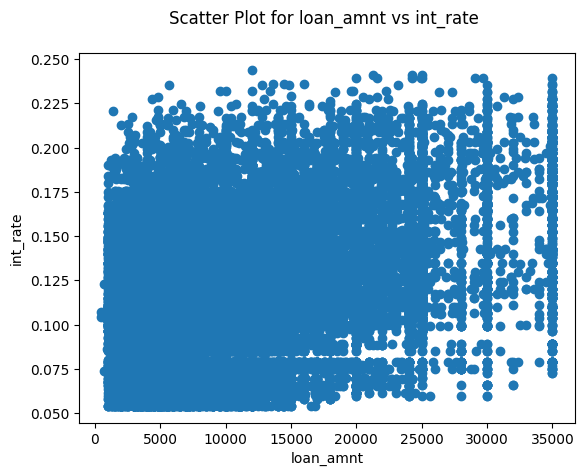

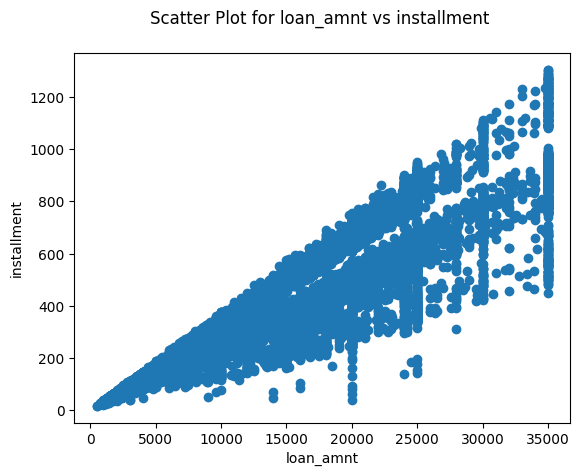

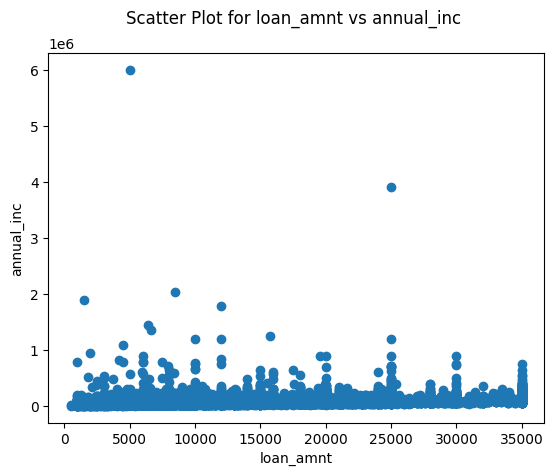

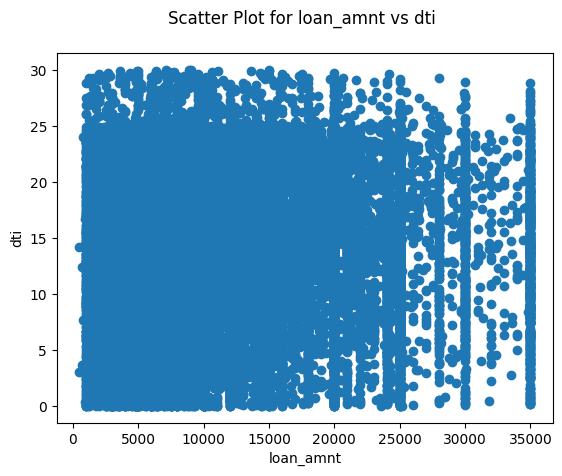

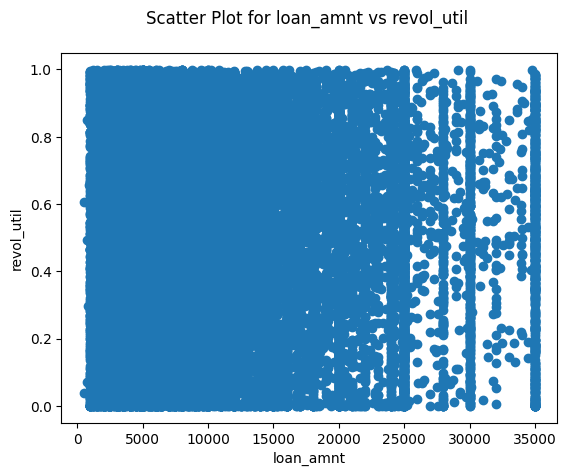

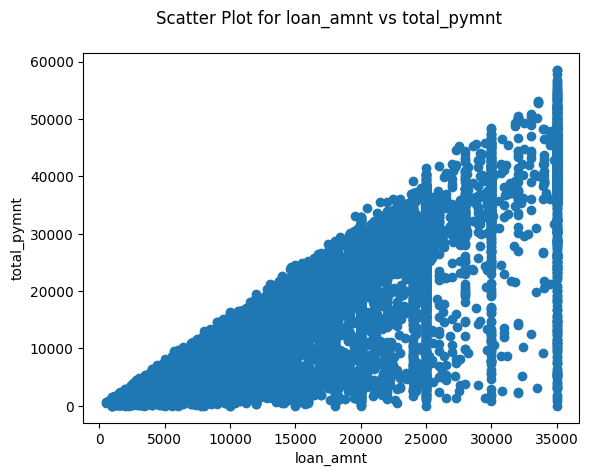

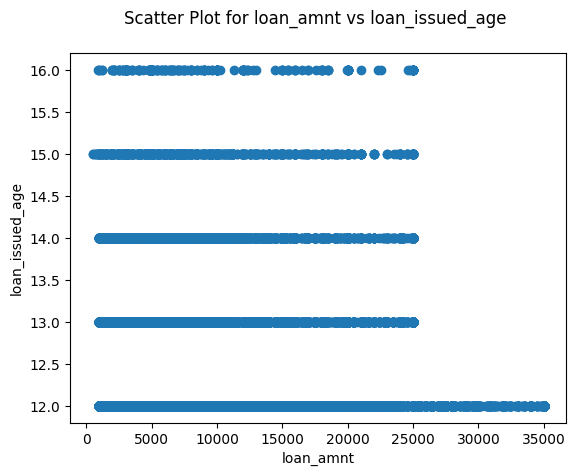

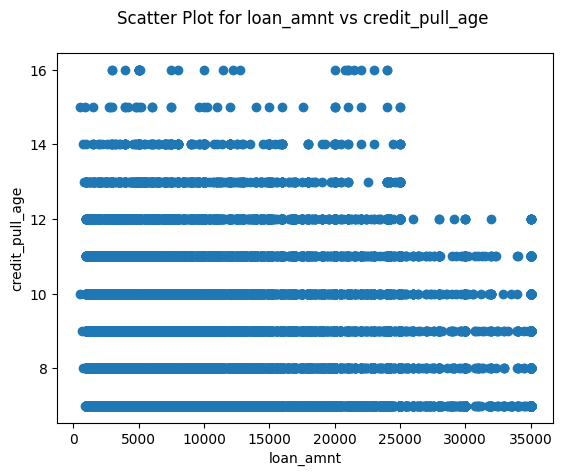

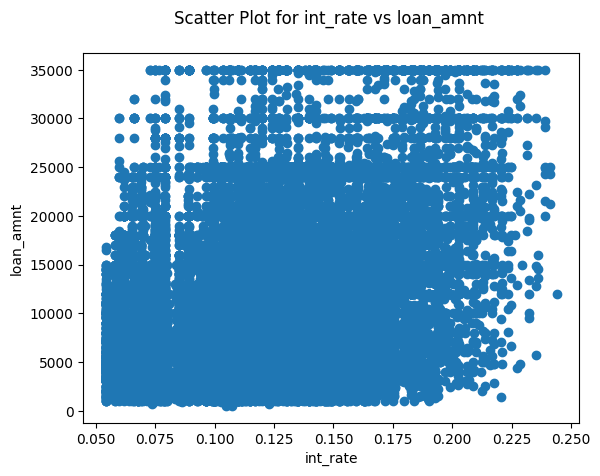

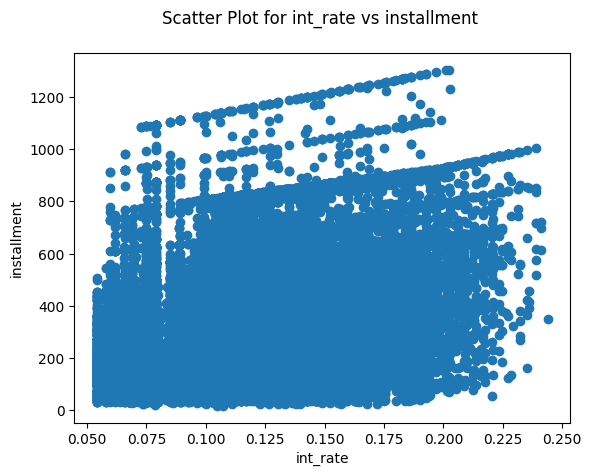

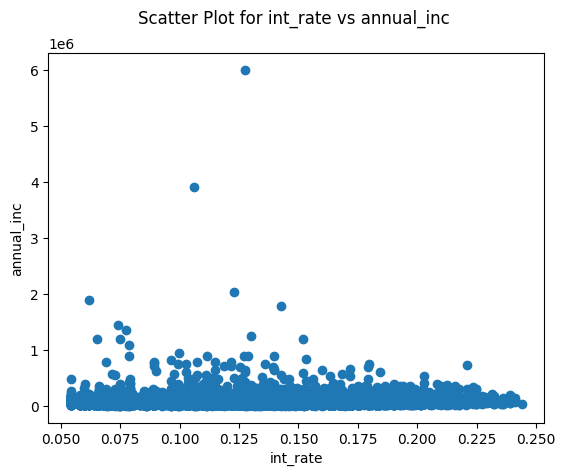

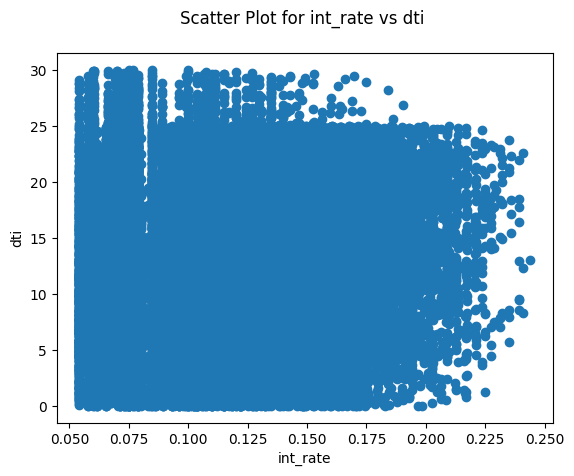

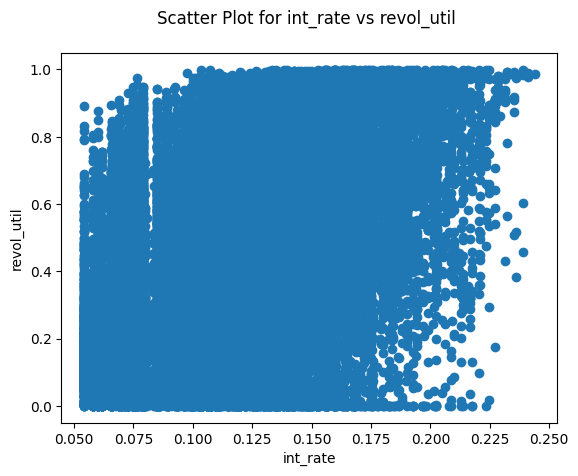

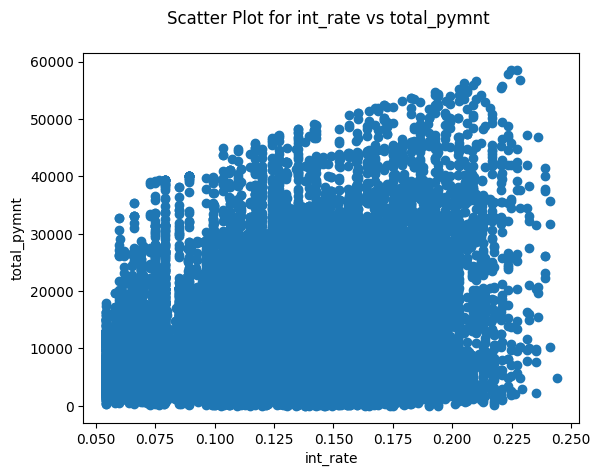

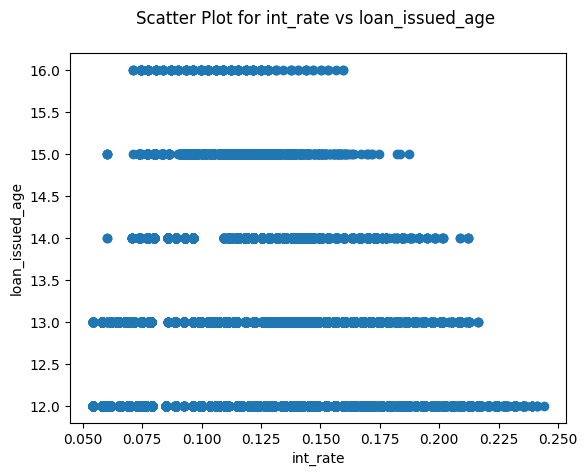

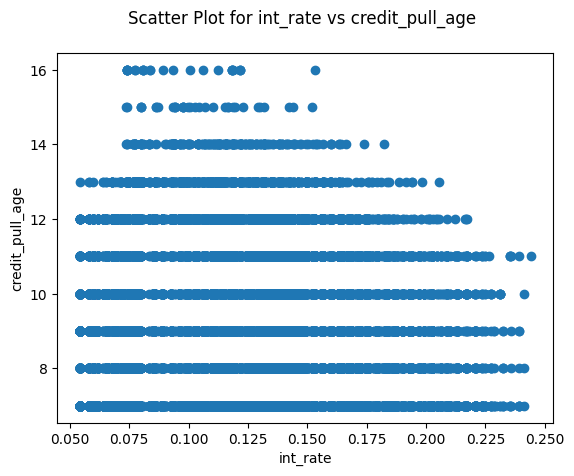

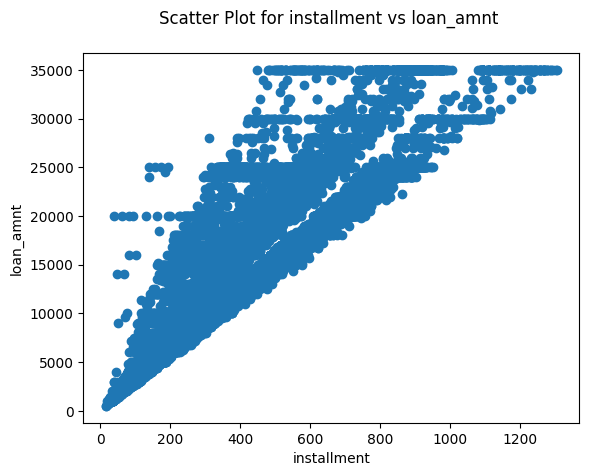

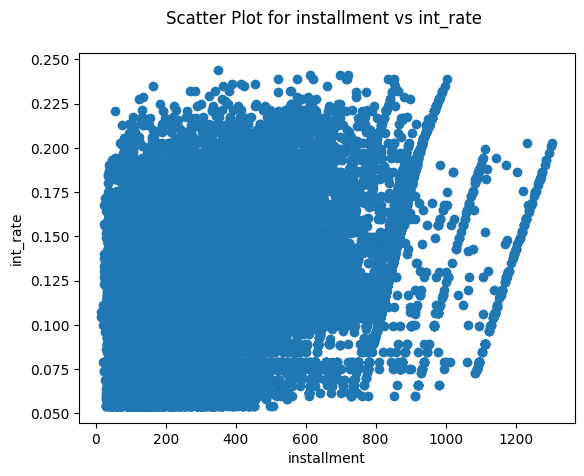

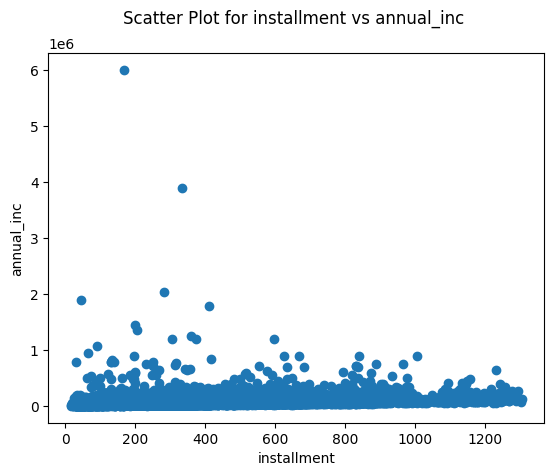

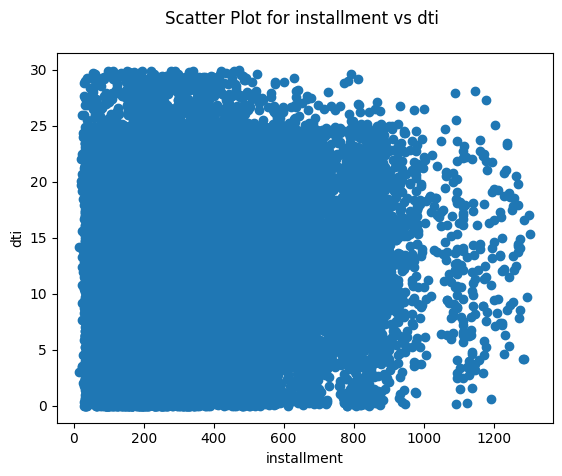

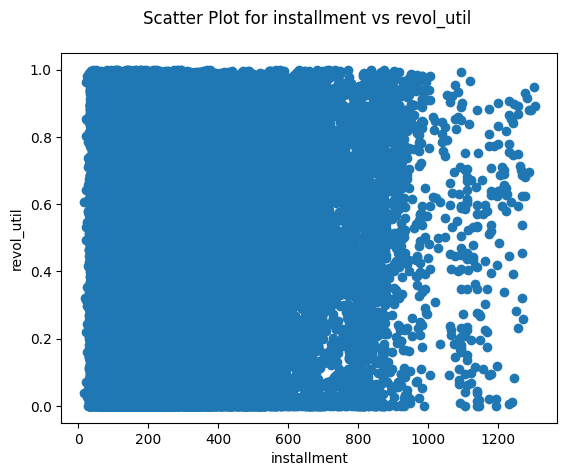

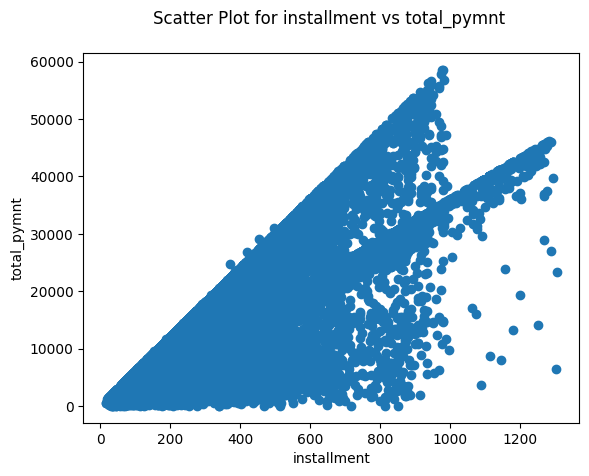

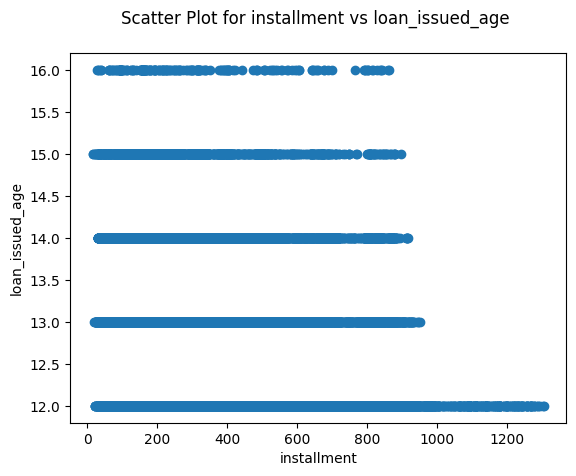

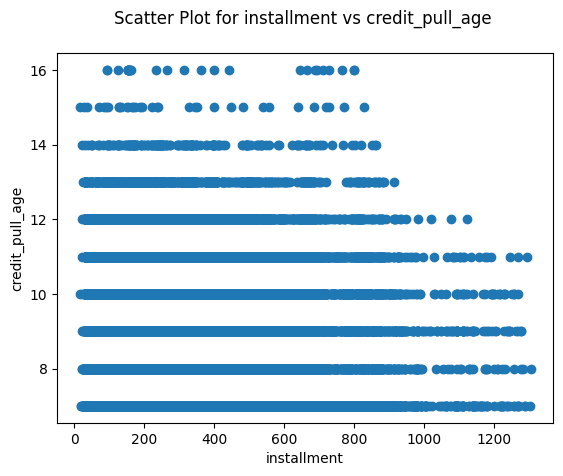

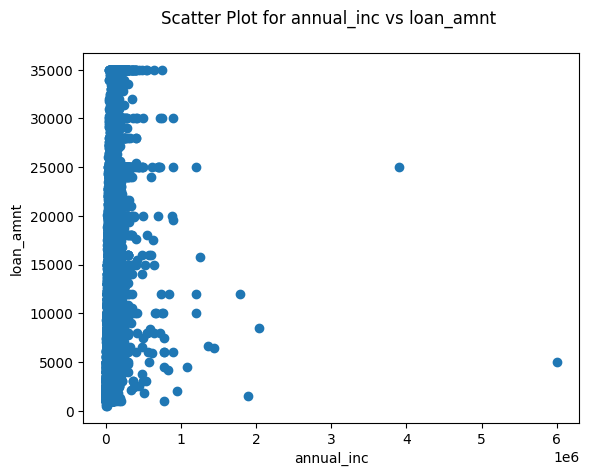

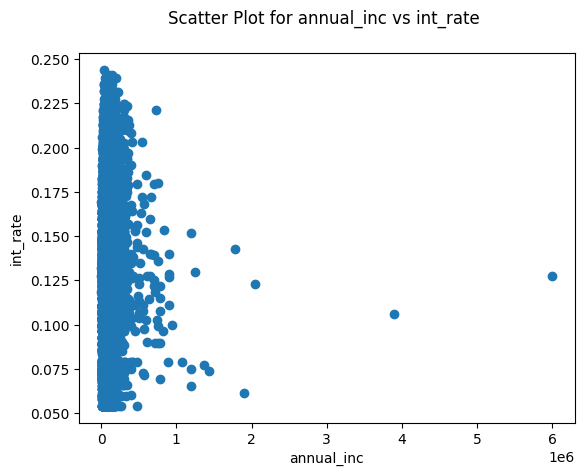

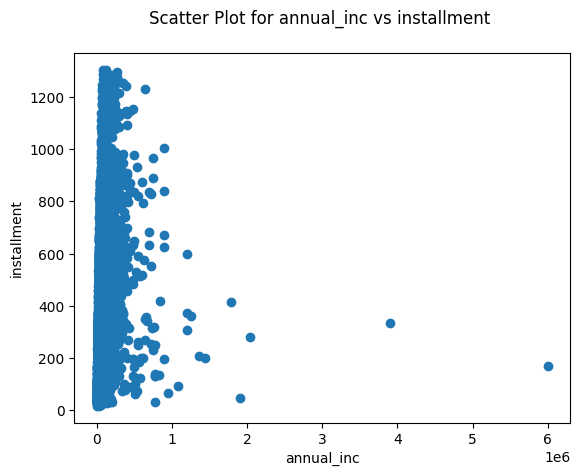

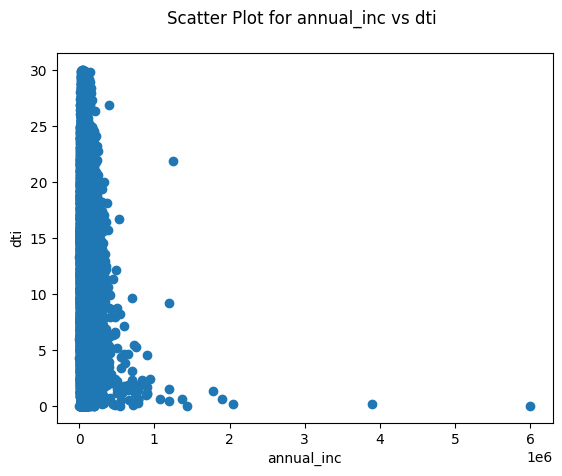

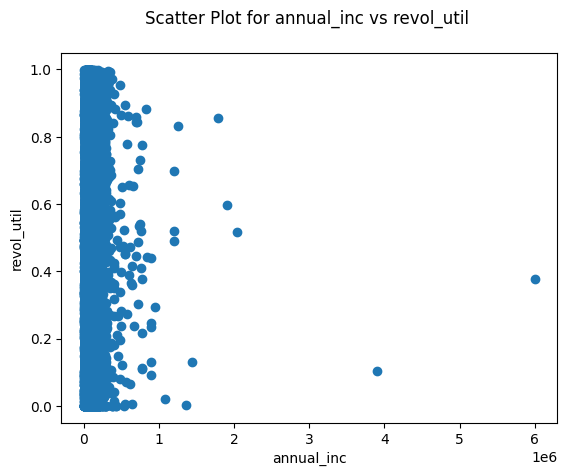

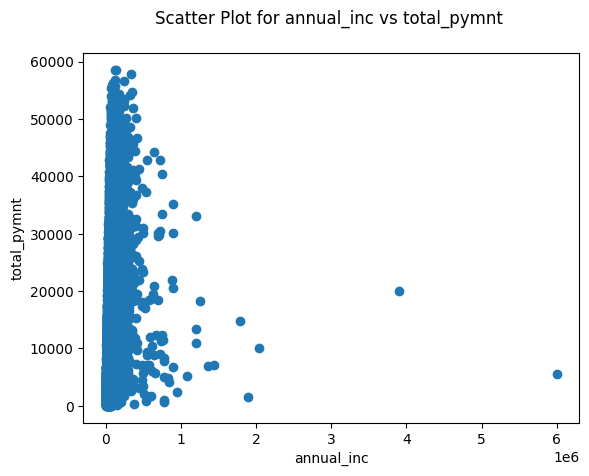

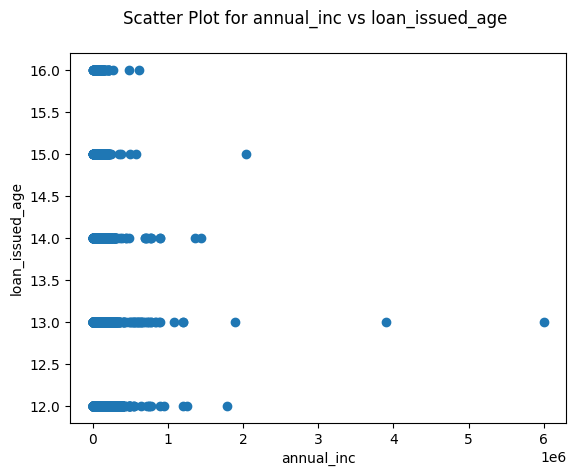

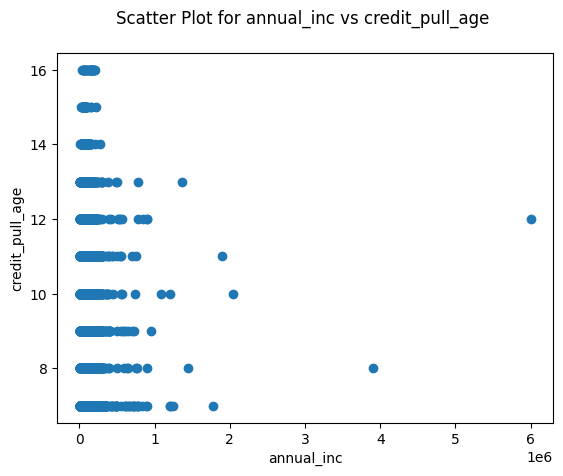

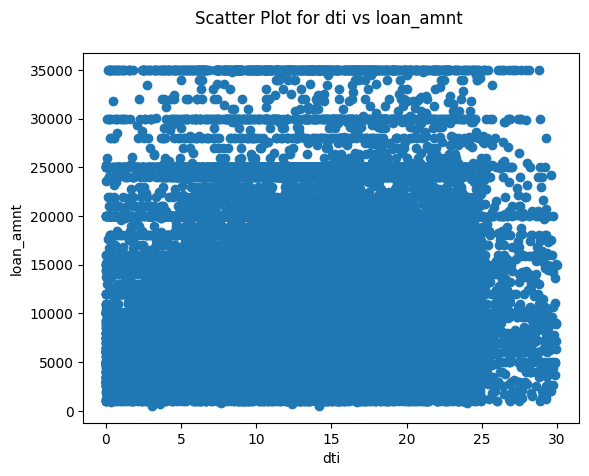

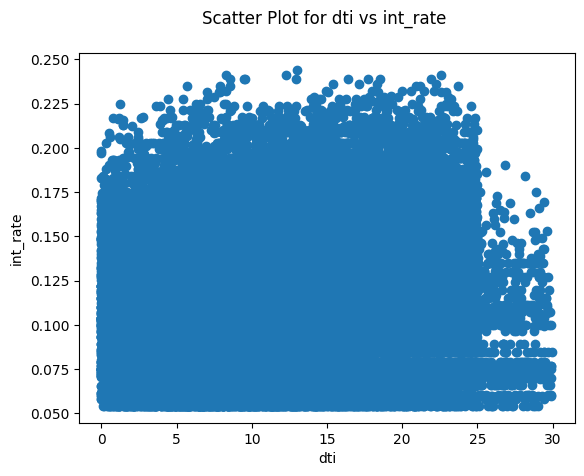

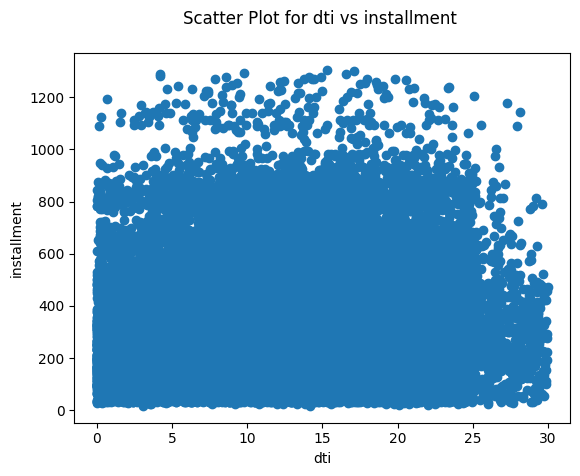

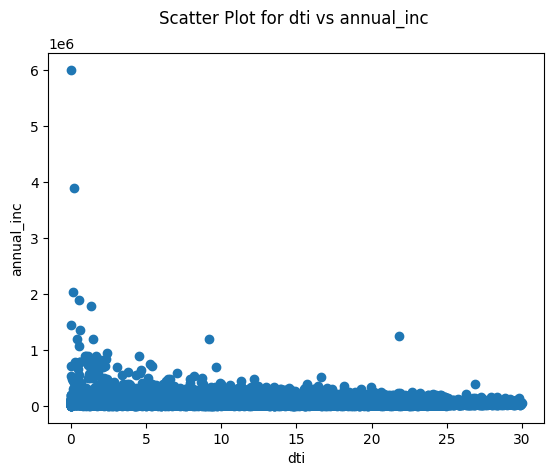

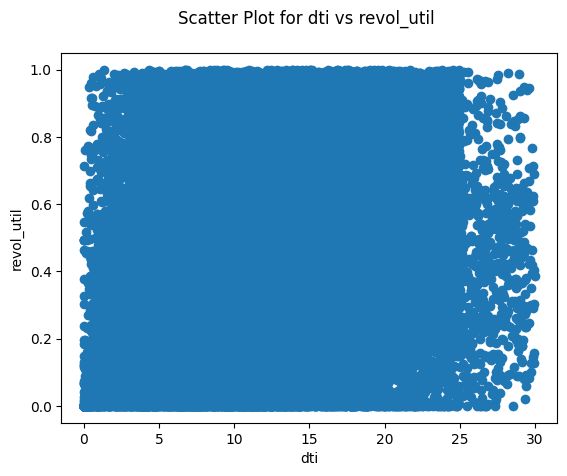

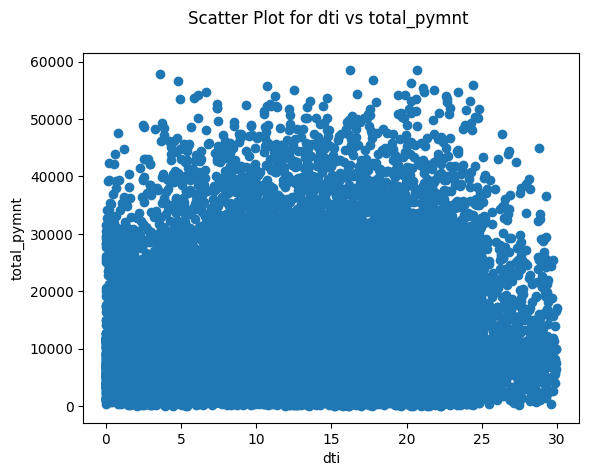

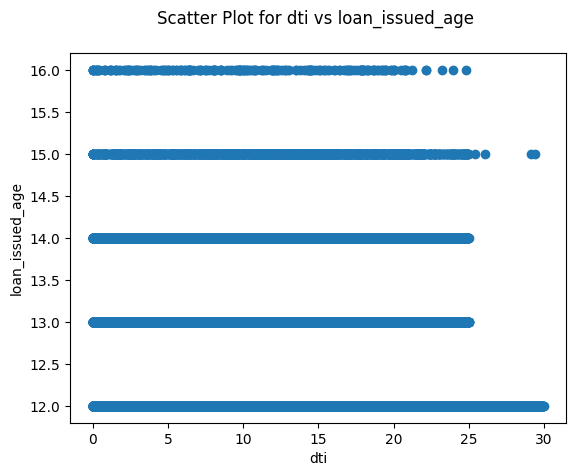

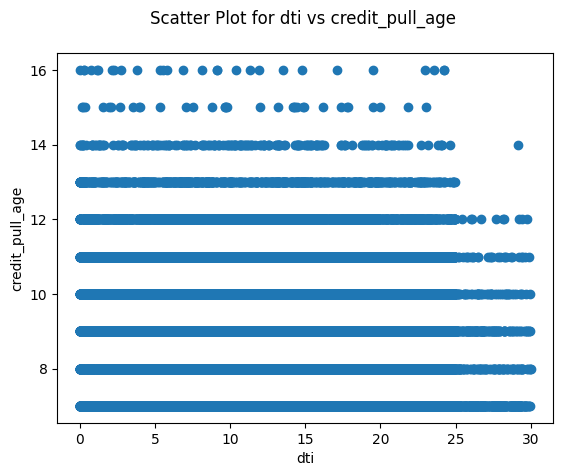

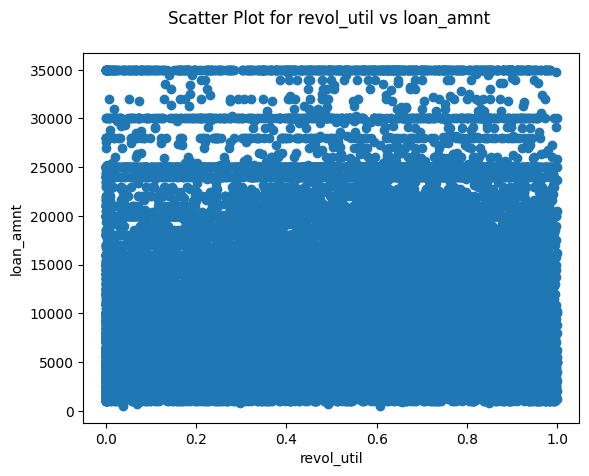

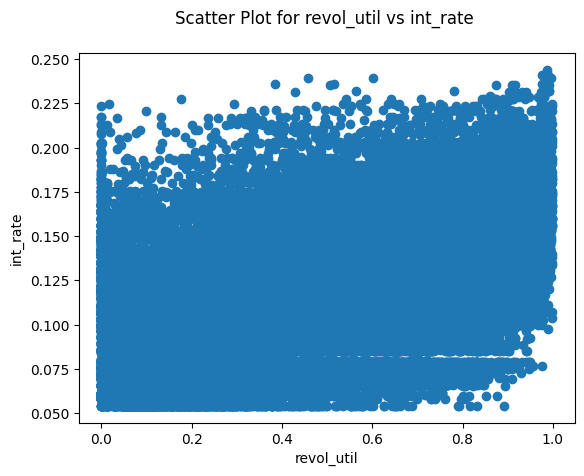

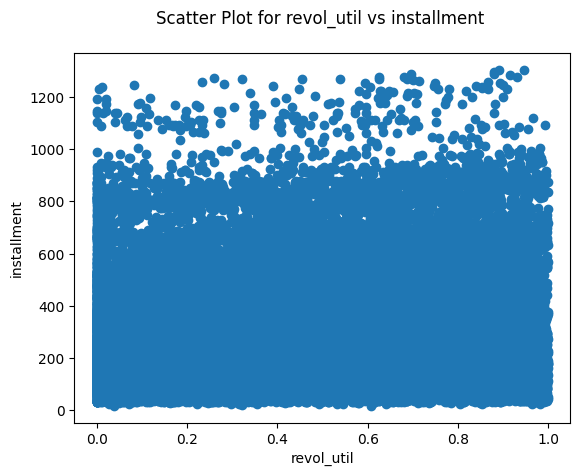

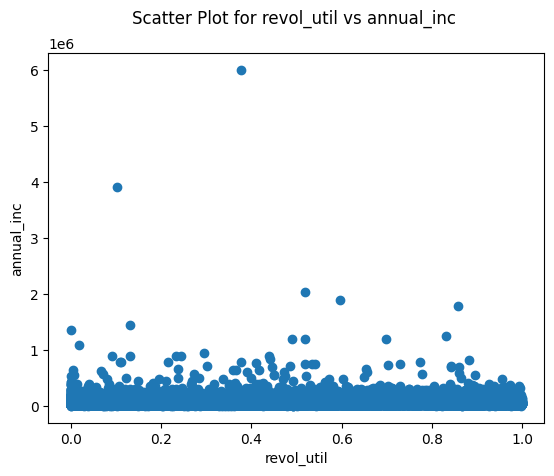

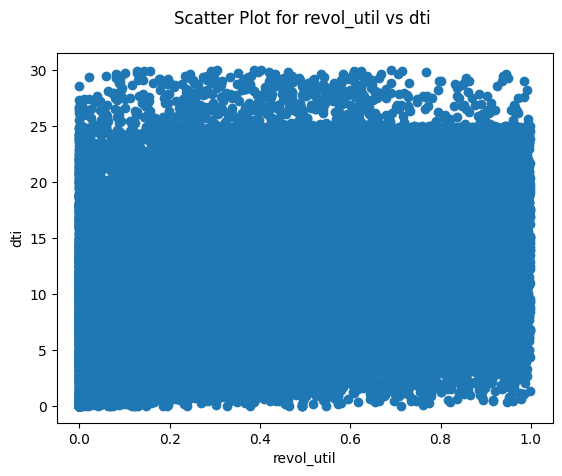

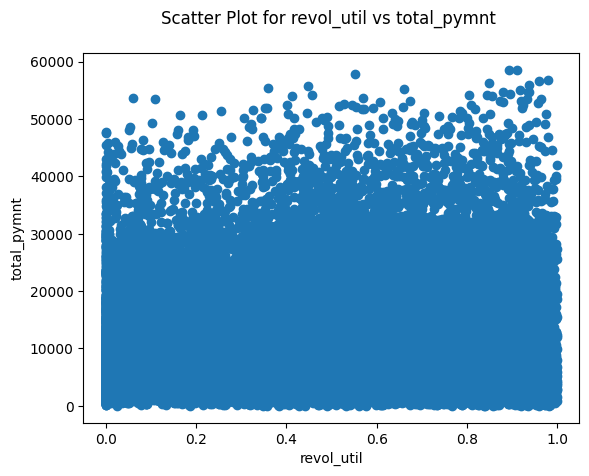

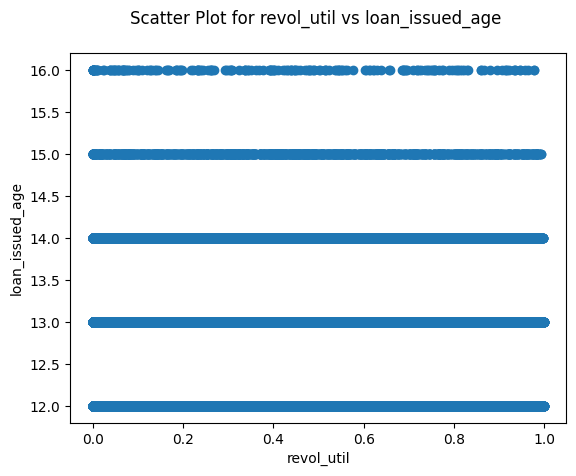

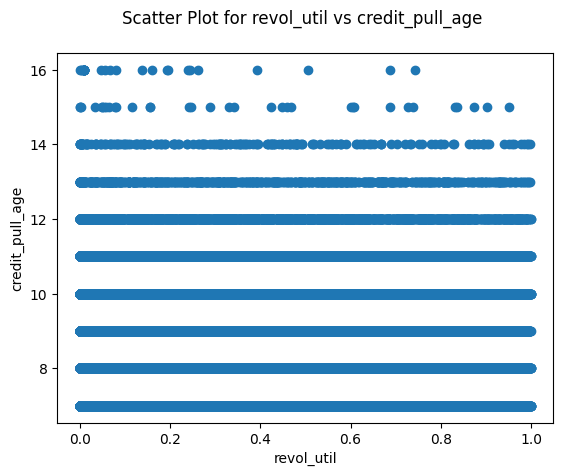

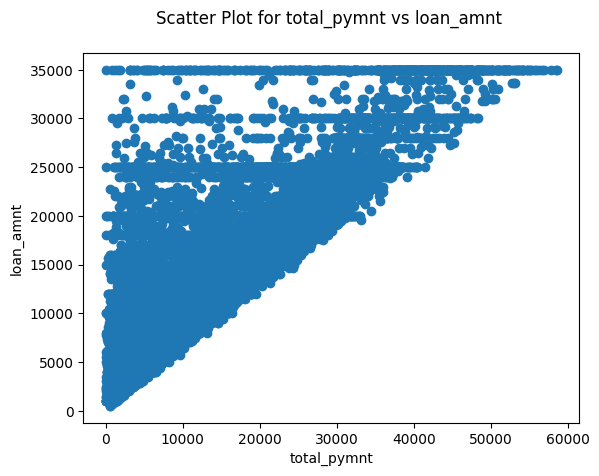

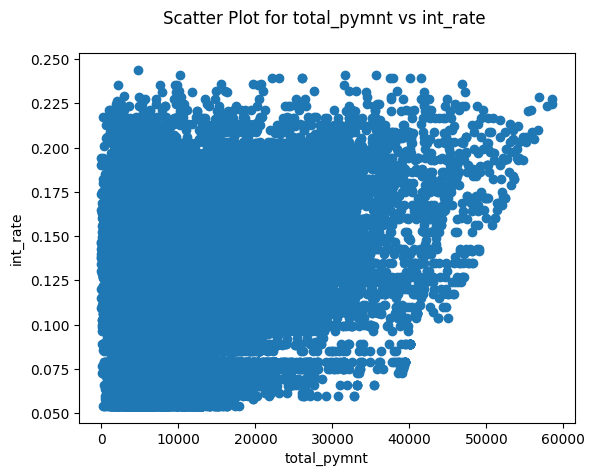

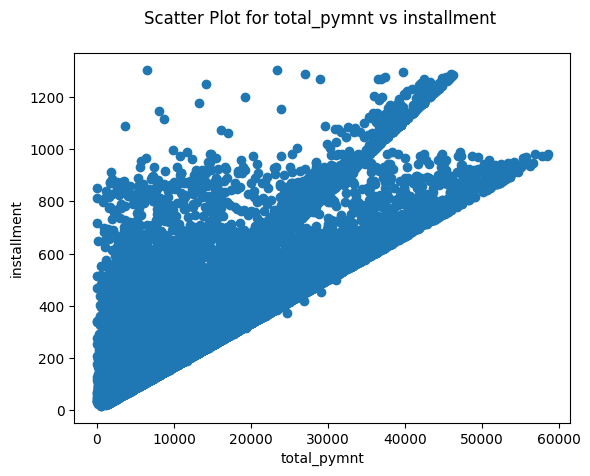

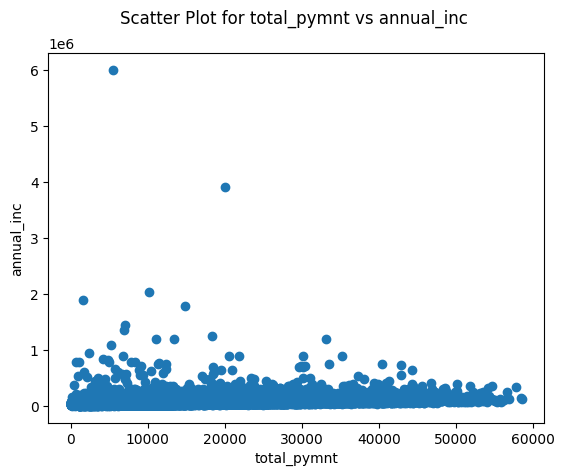

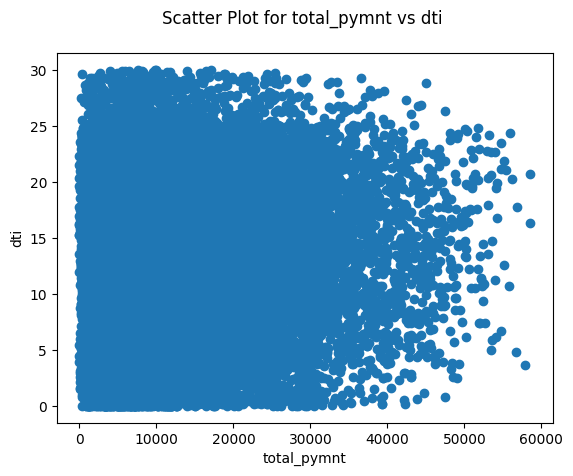

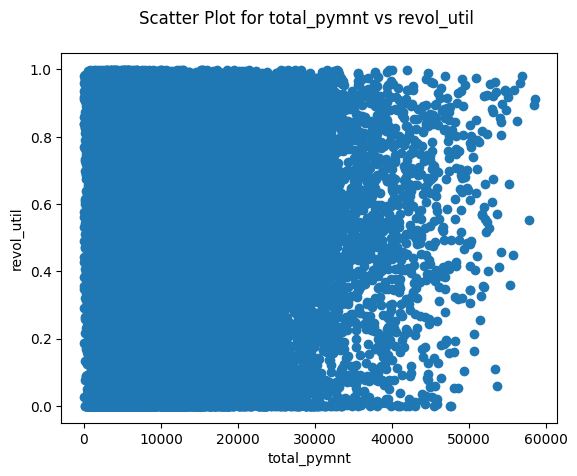

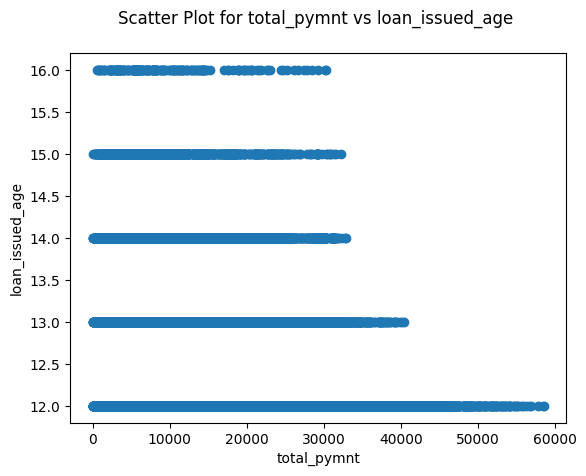

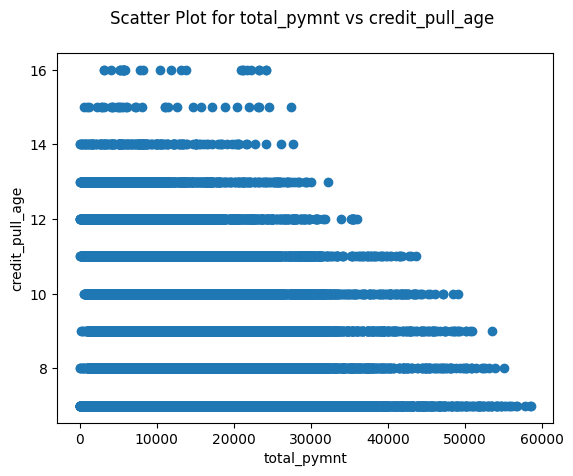

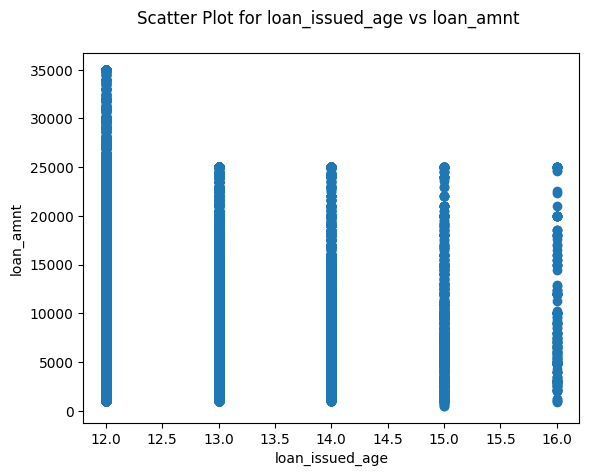

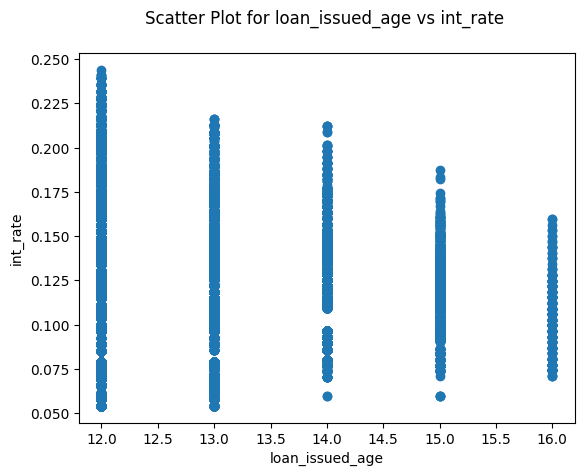

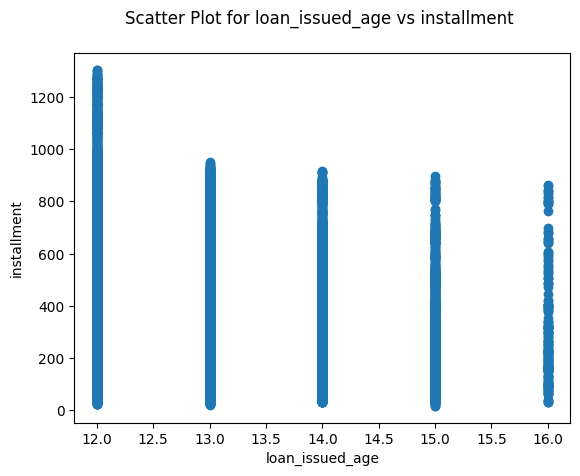

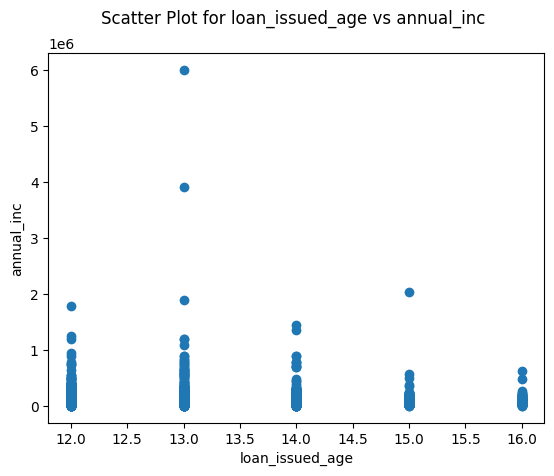

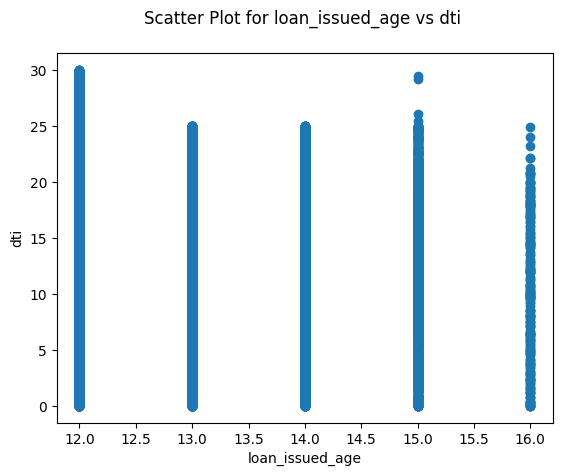

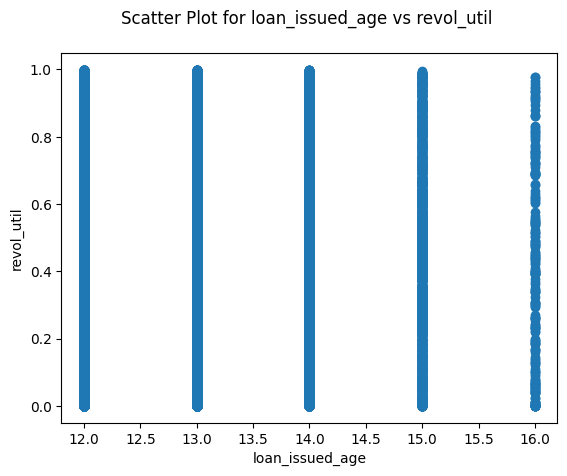

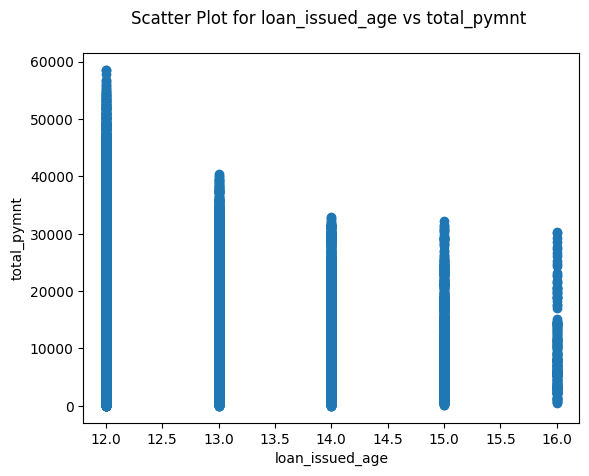

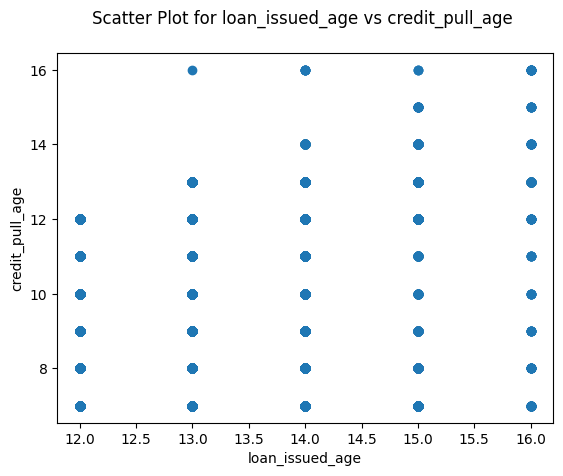

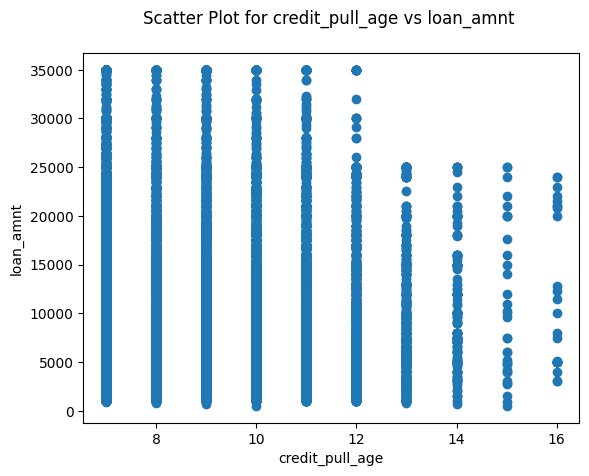

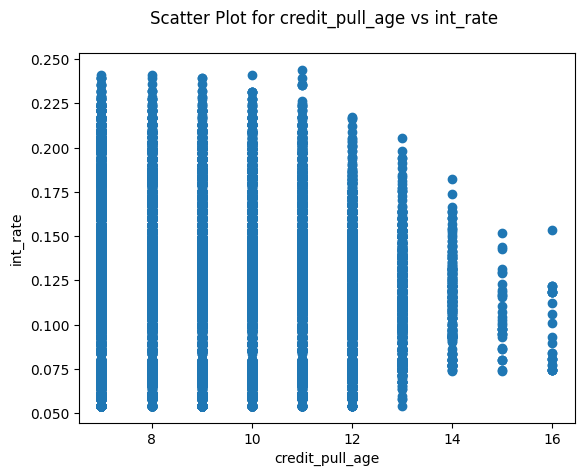

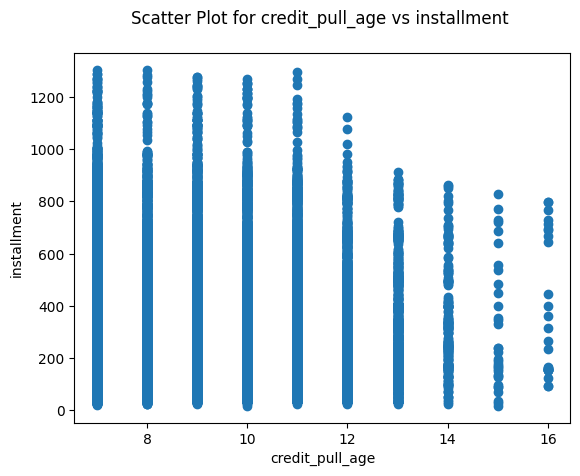

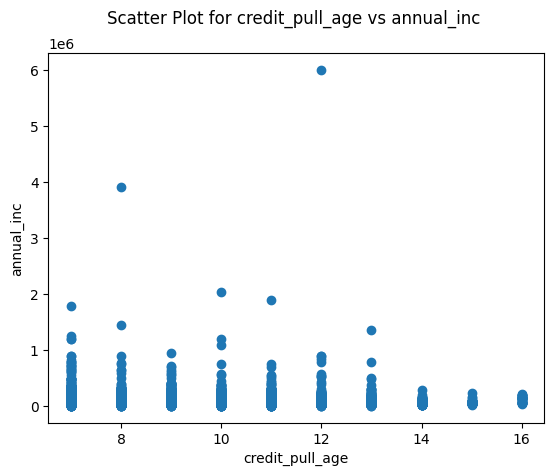

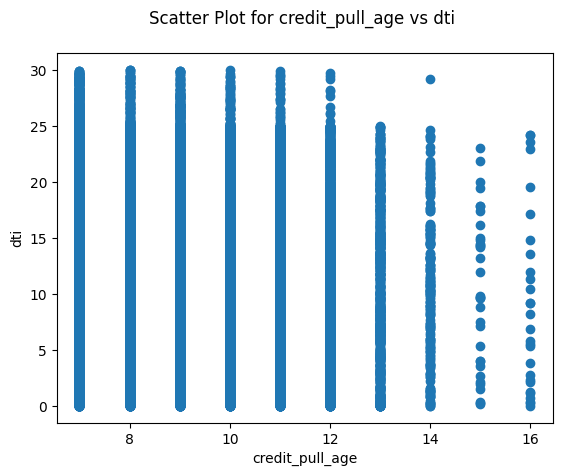

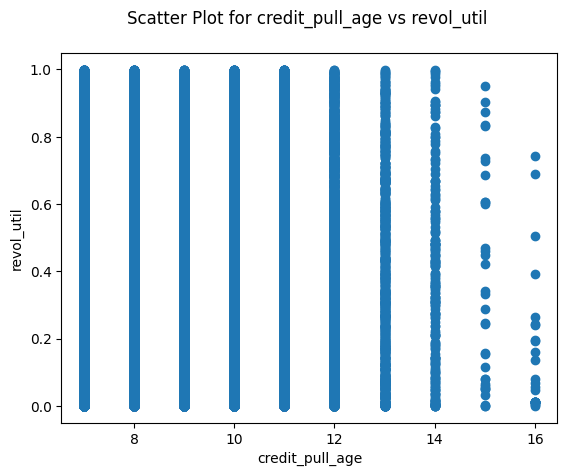

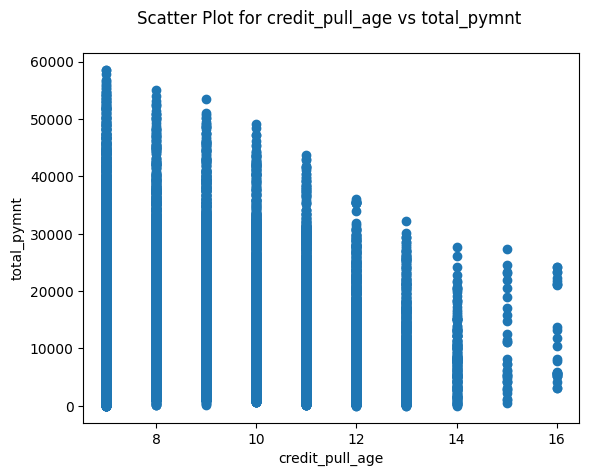

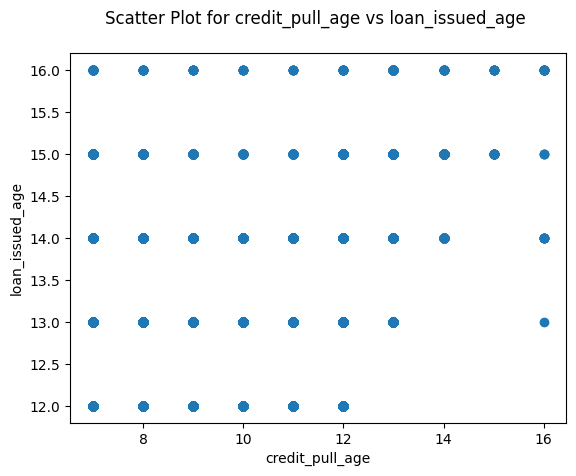

In [74]:
for x in numerical:
    for y in numerical:
        if x!= y:
            plt.scatter(loan_df[x], loan_df[y])
            plt.title('Scatter Plot for '+x+' vs '+y+' \n')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()

In [75]:
### ANALYSIS
#### installment vs loan_amnt: Linearly proportional, in most of the cases if one increases the other is same or increases
### total_pymnt vs loan_amnt :  Linearly proportional, in most of the cases if one increases the other is same or increases
### last_pymnt_amnt vs loan_amnt :  Linearly proportional, in most of the cases if one increases the other is same or increases

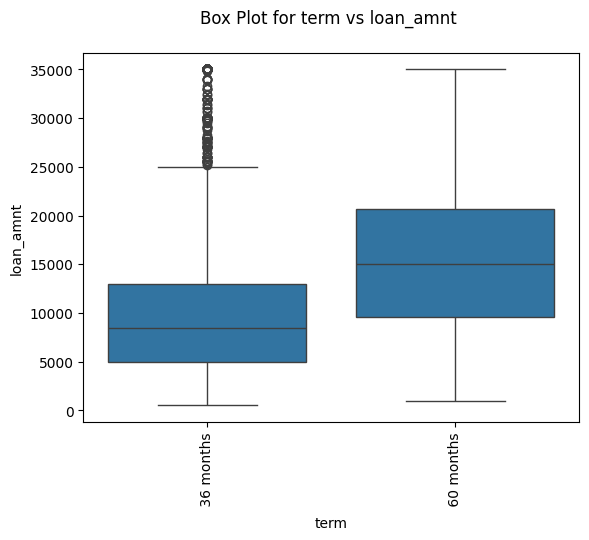

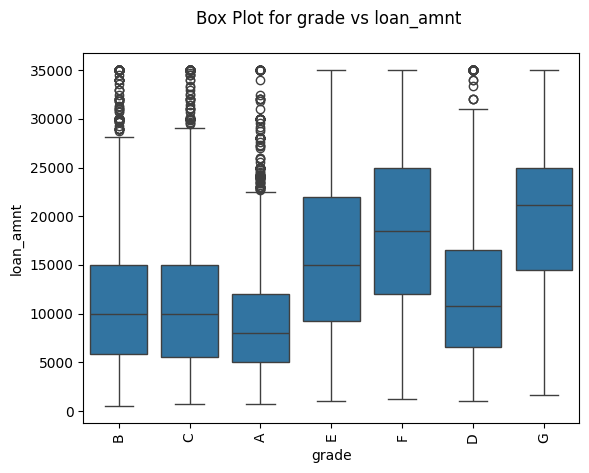

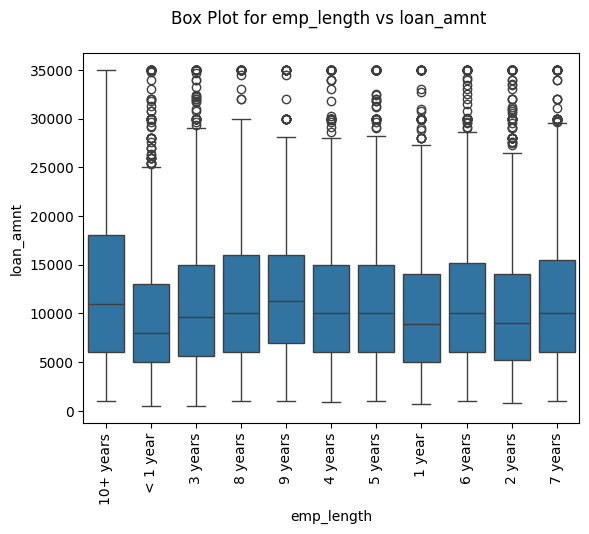

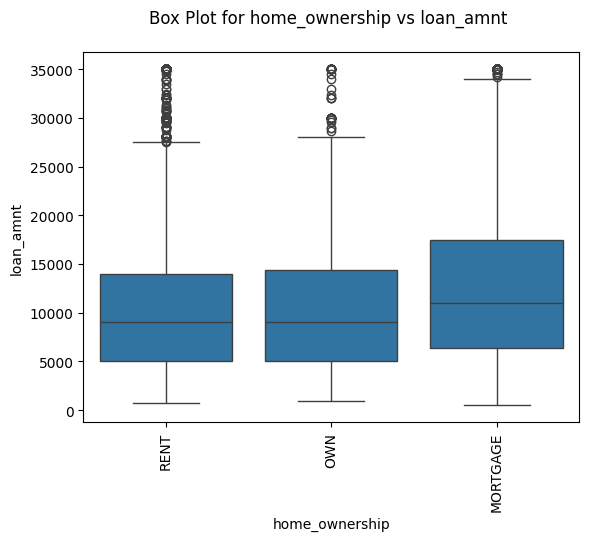

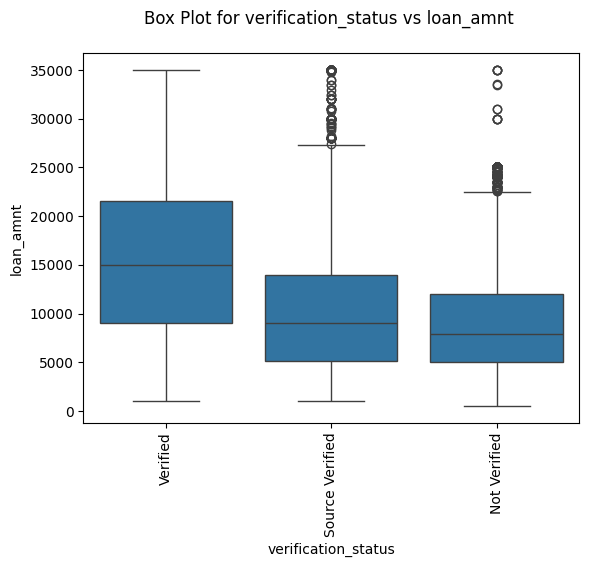

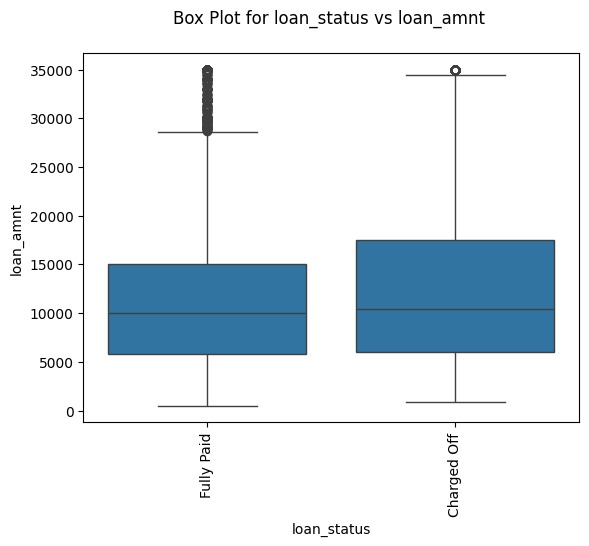

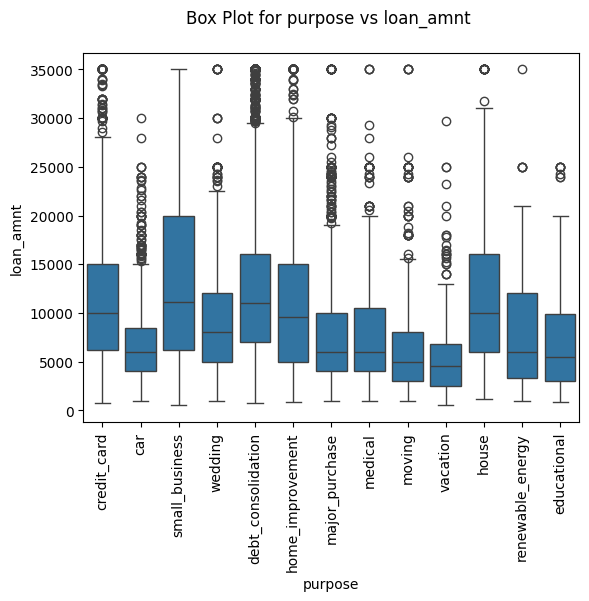

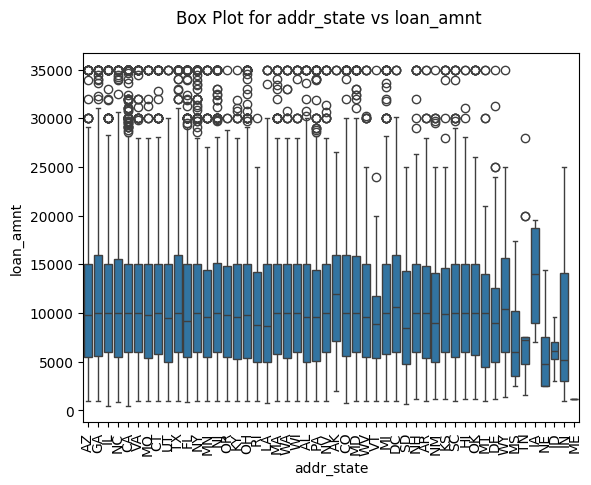

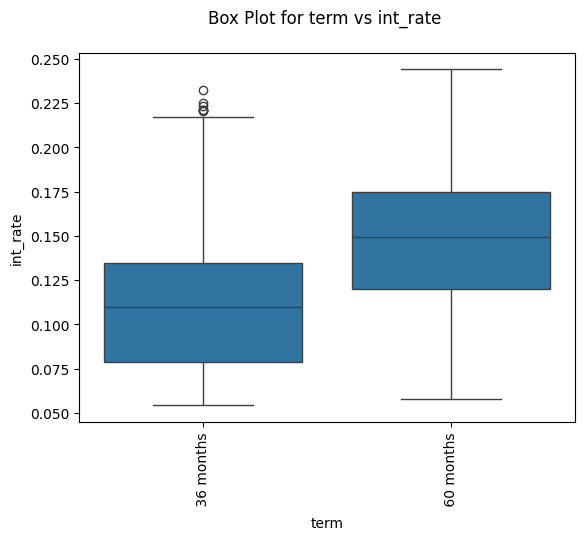

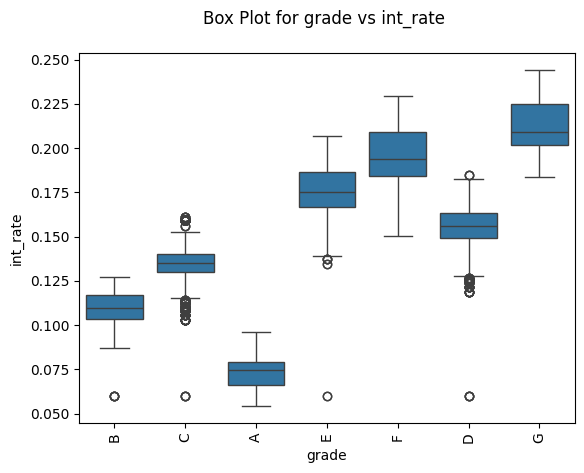

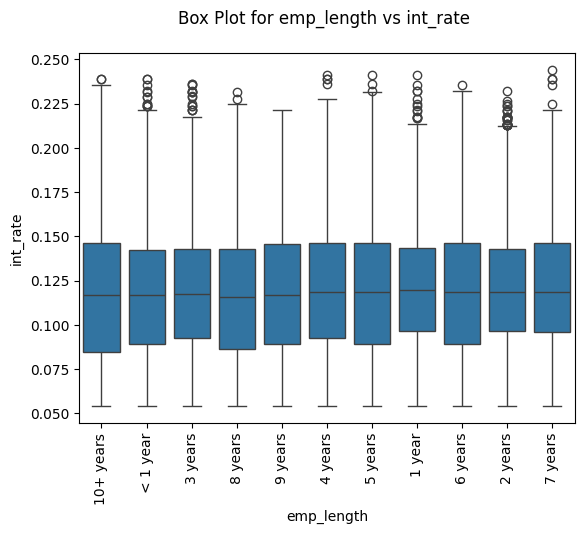

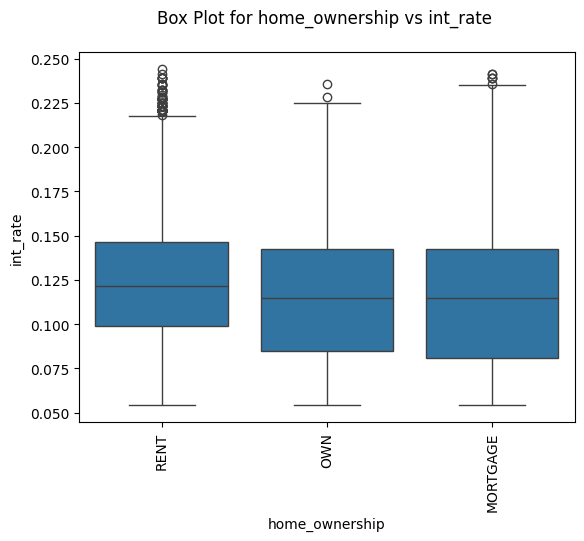

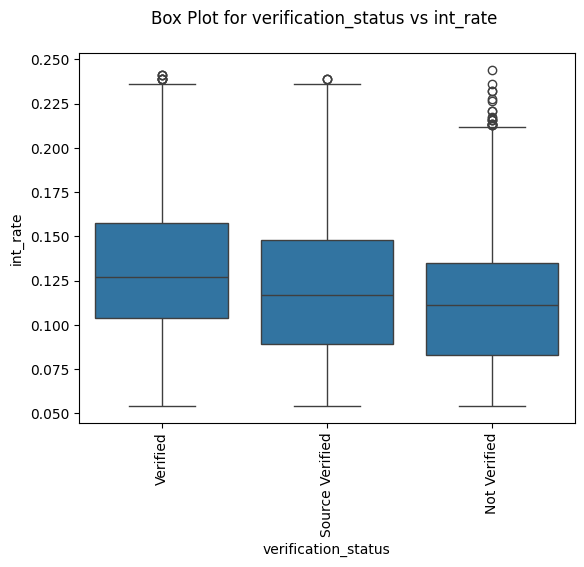

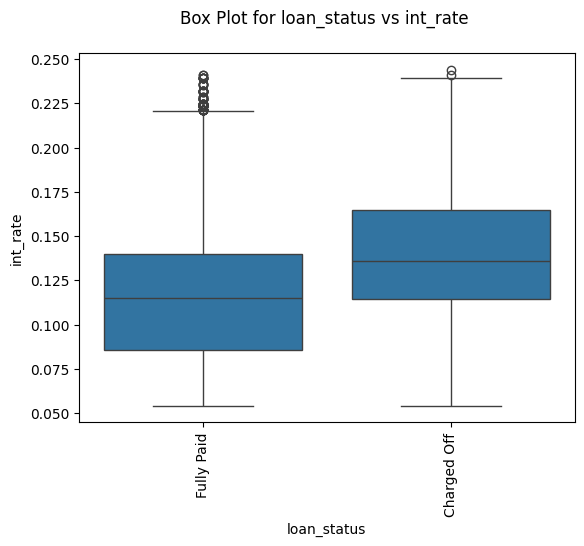

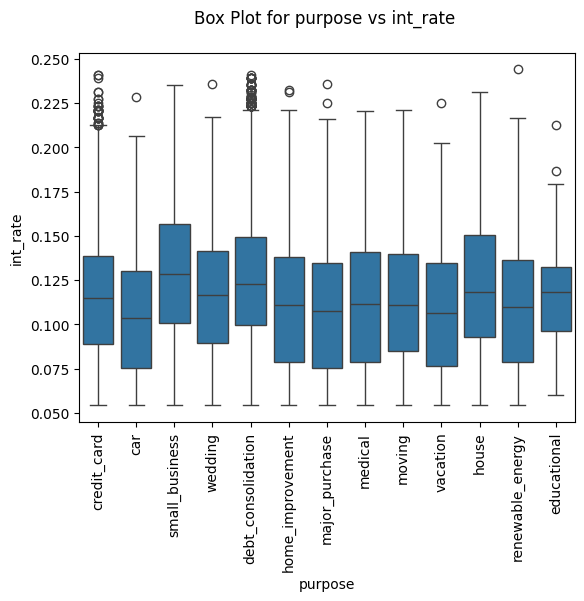

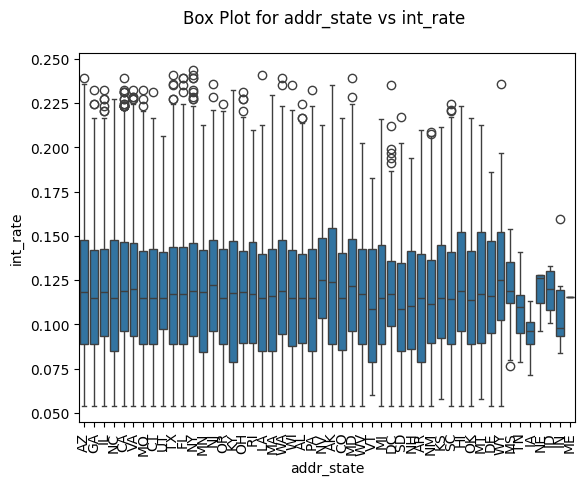

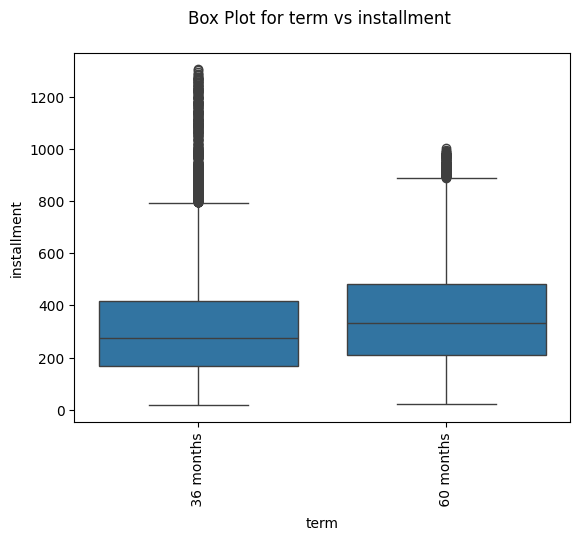

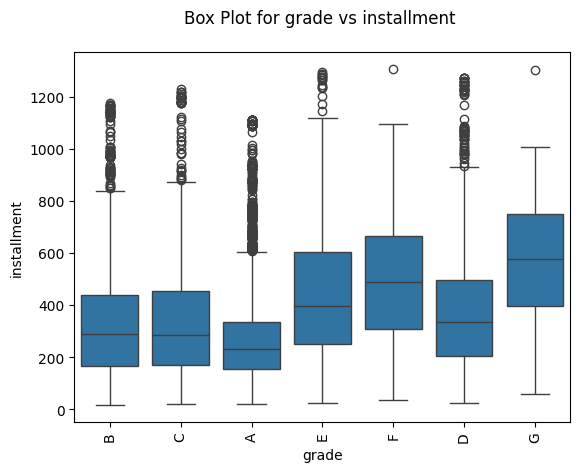

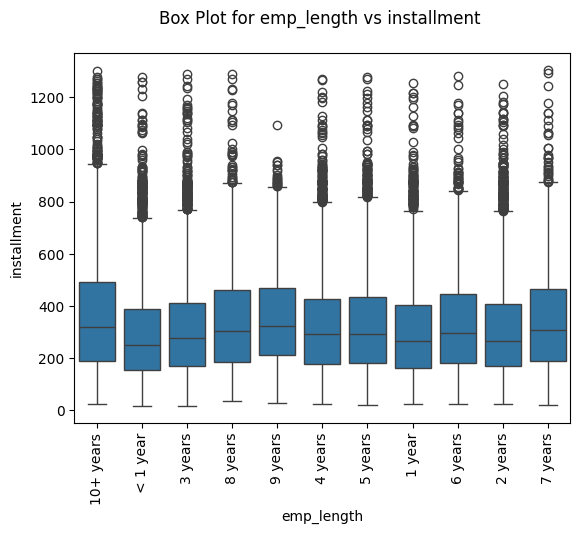

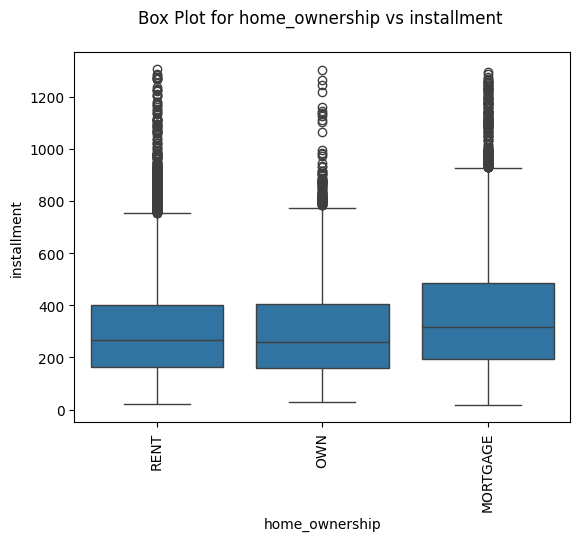

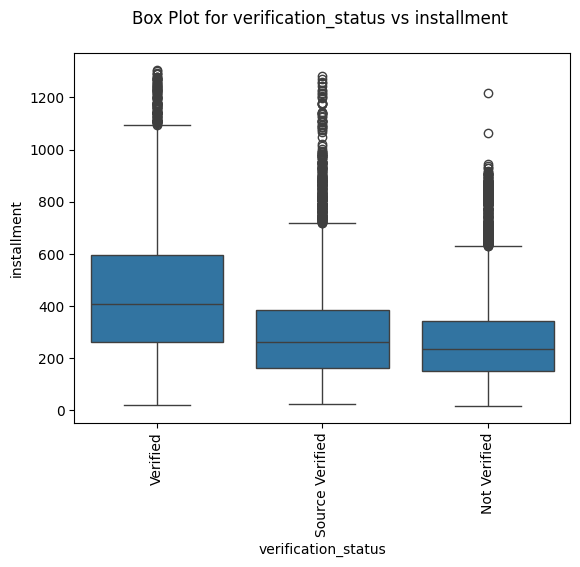

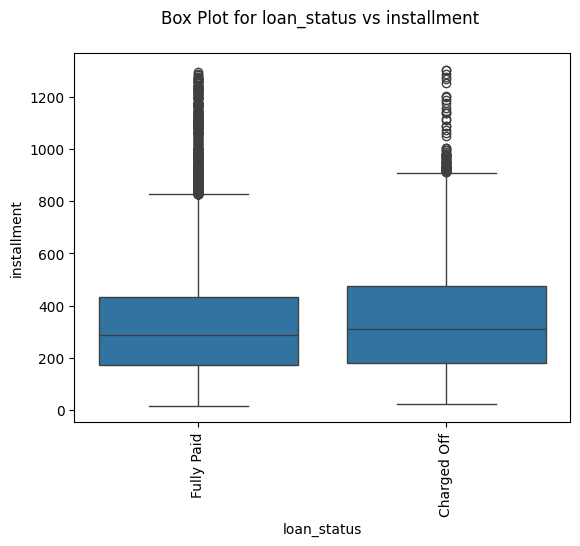

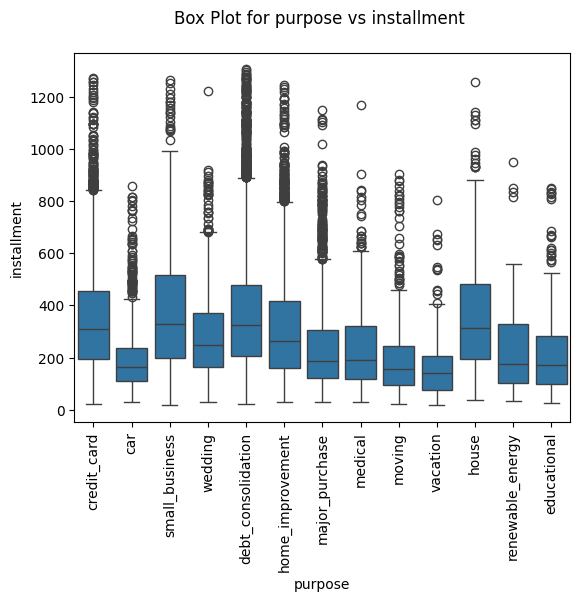

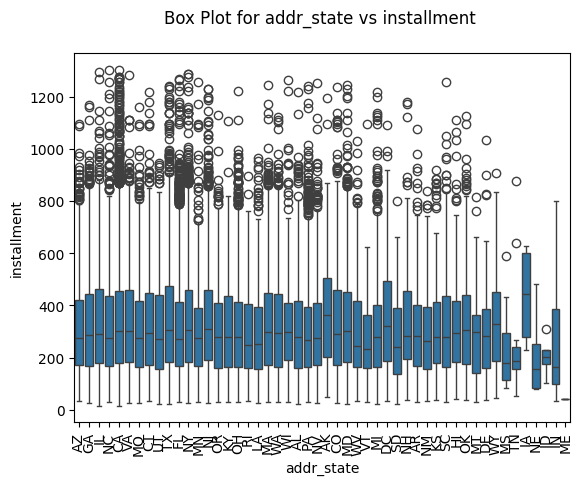

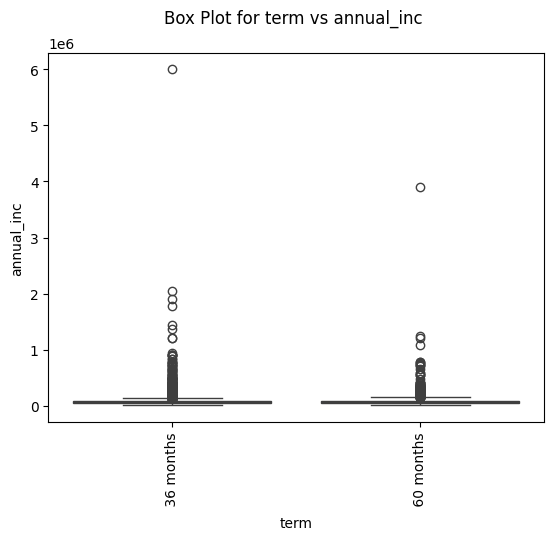

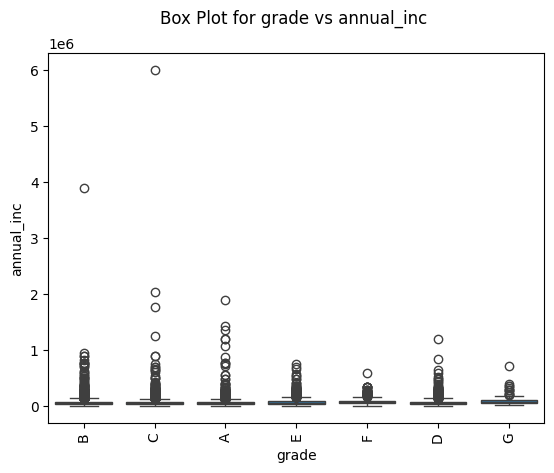

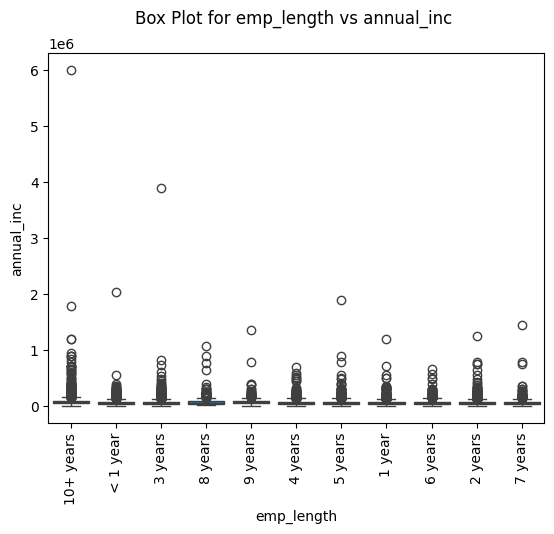

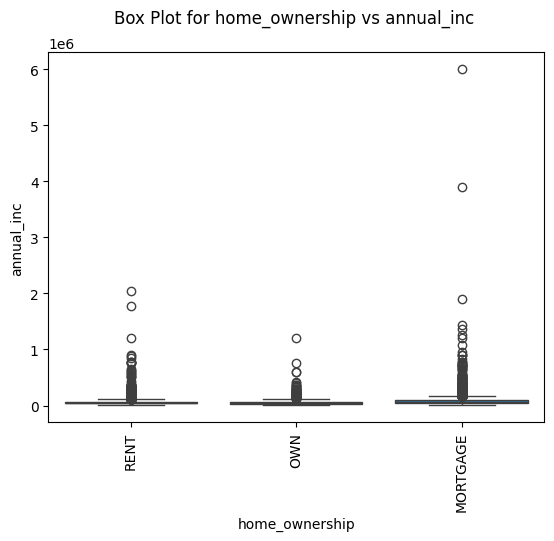

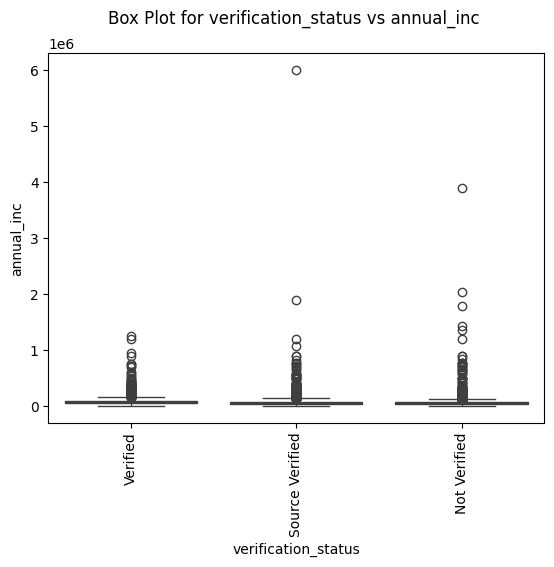

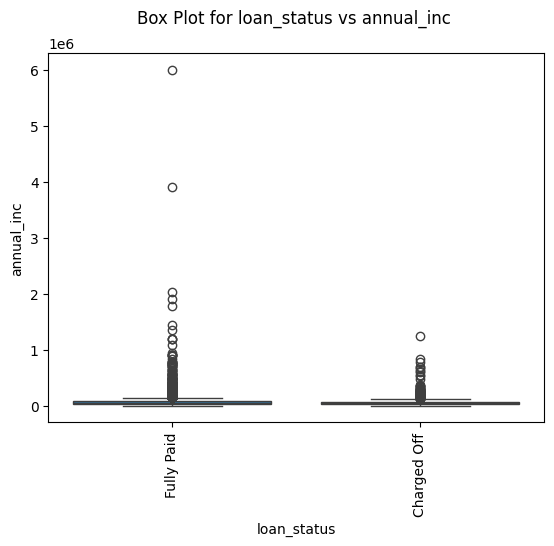

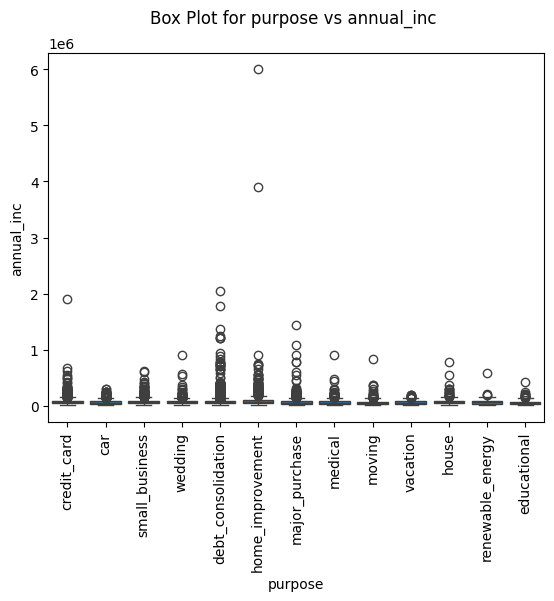

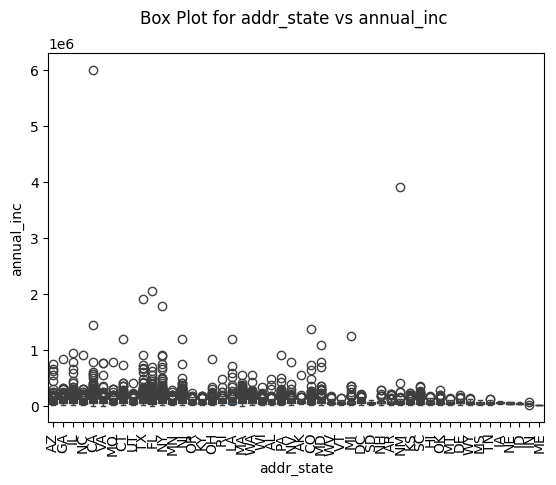

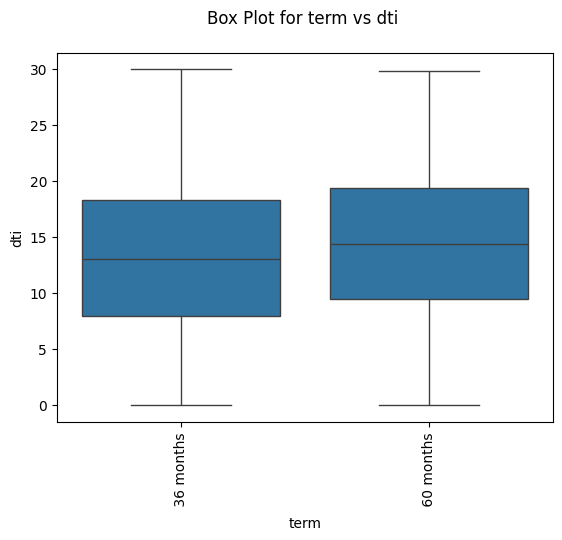

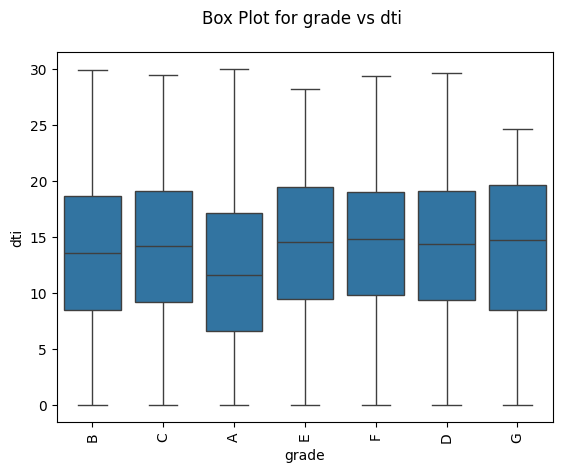

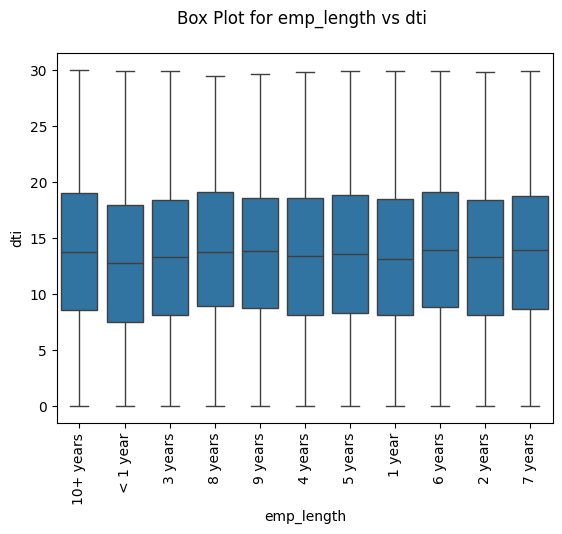

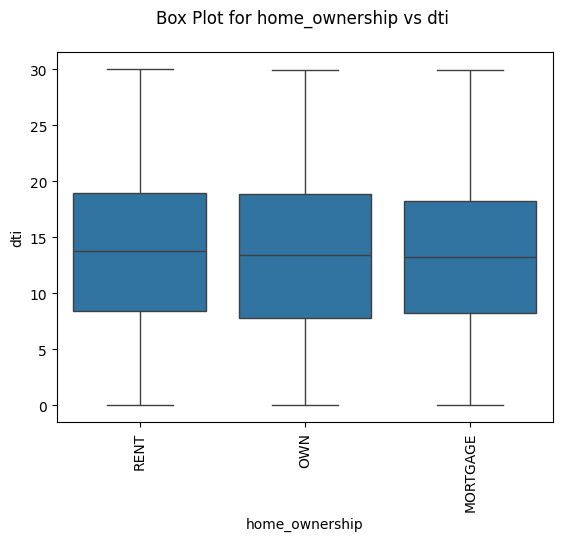

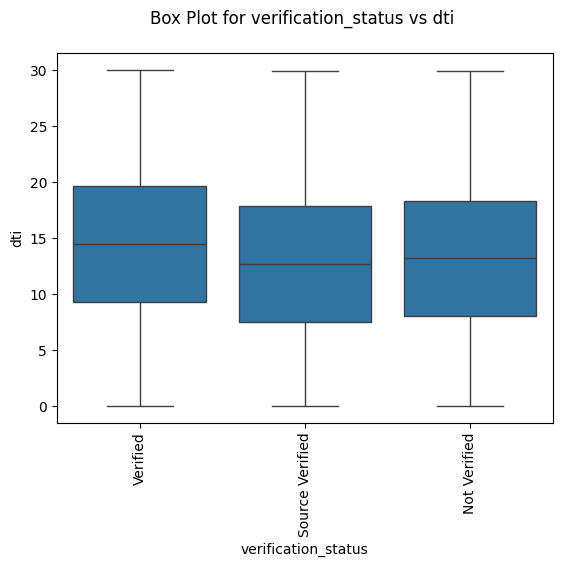

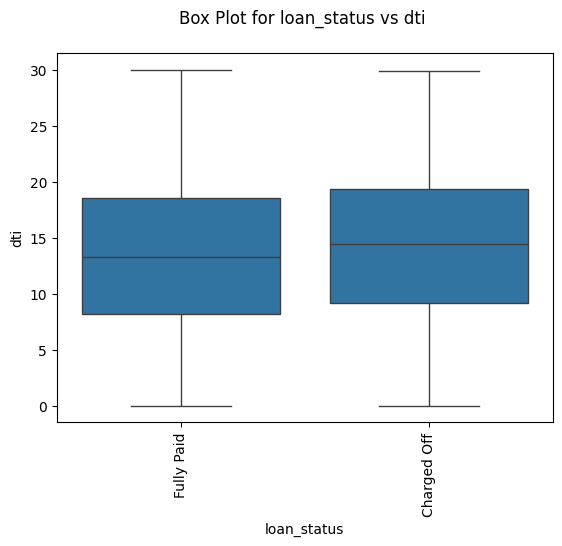

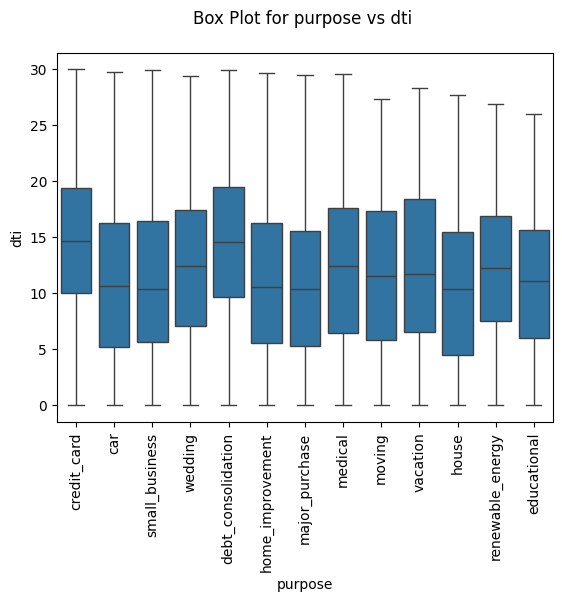

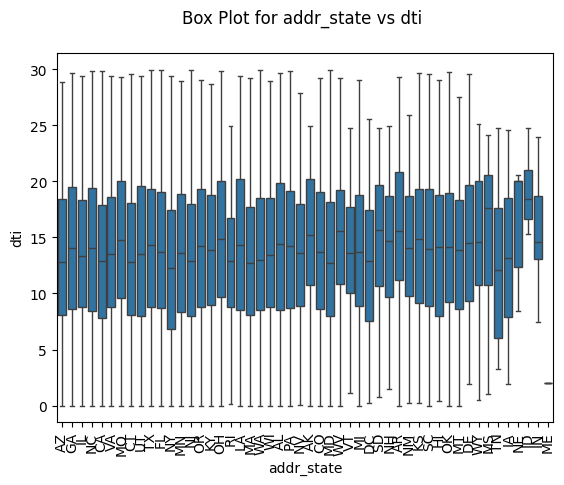

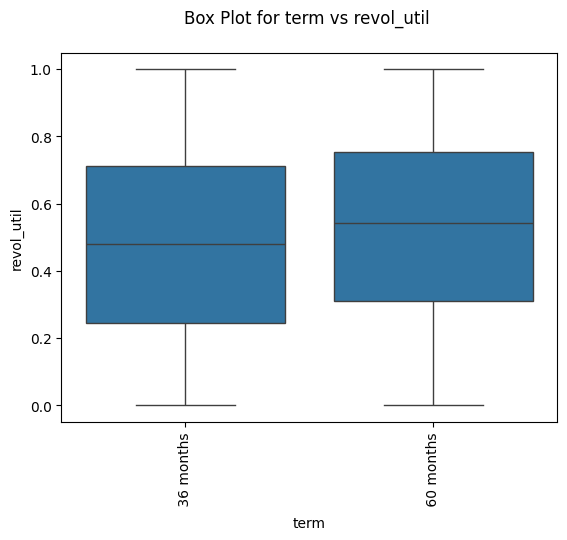

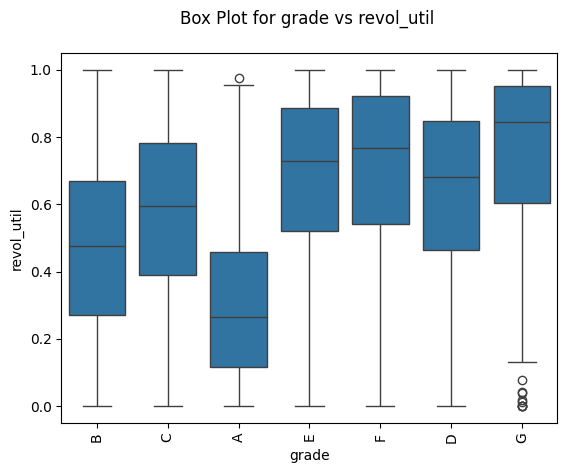

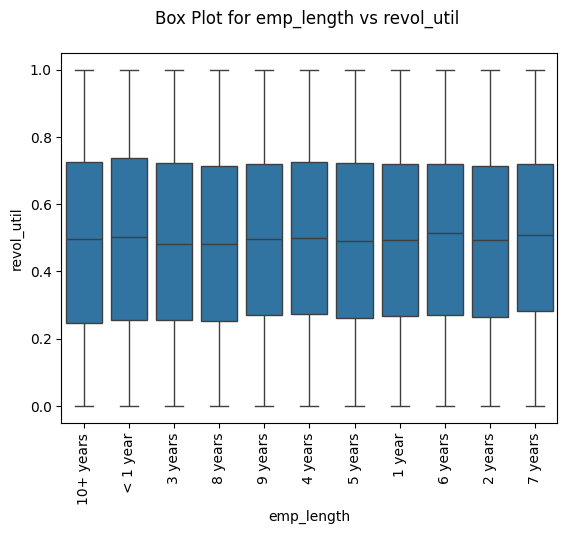

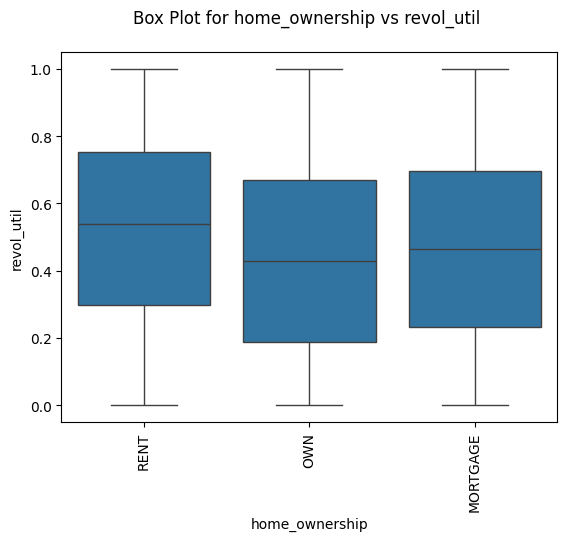

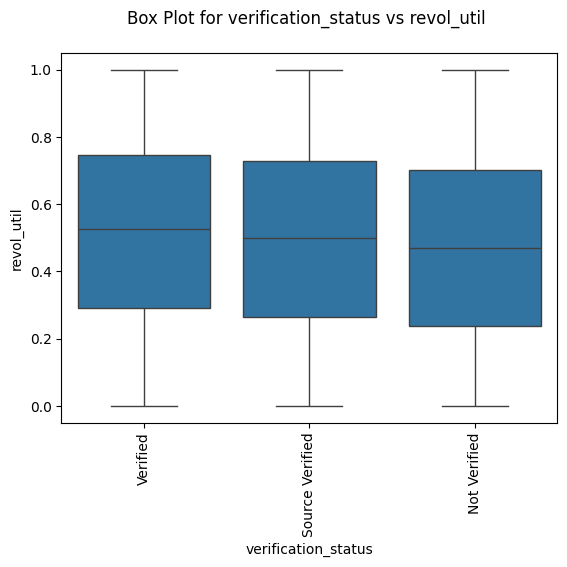

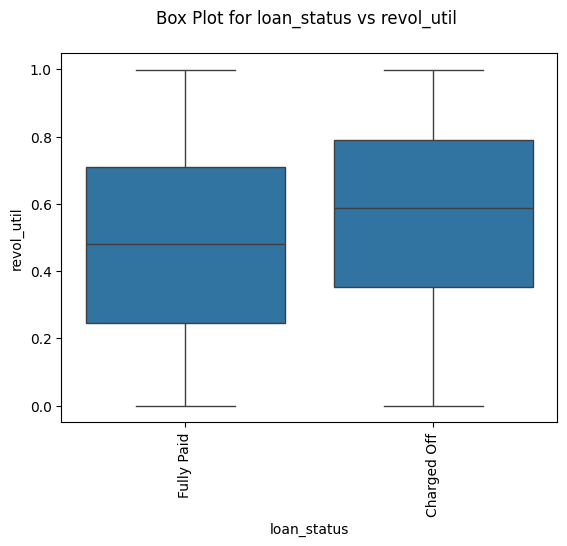

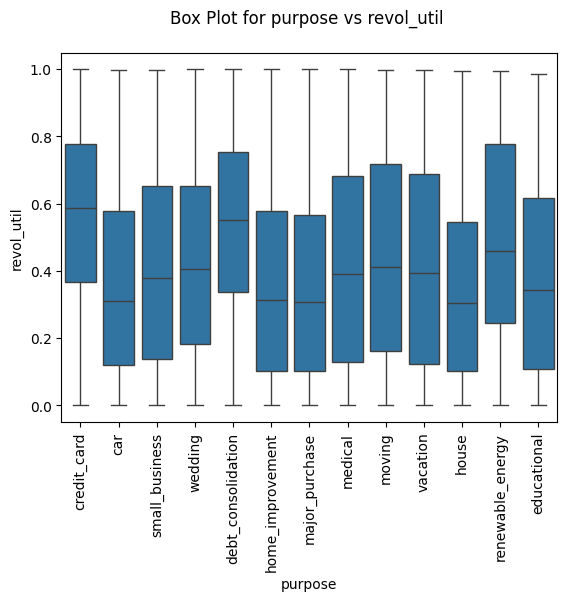

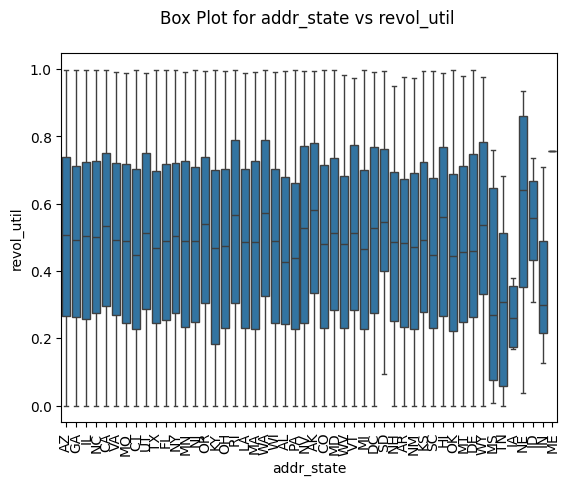

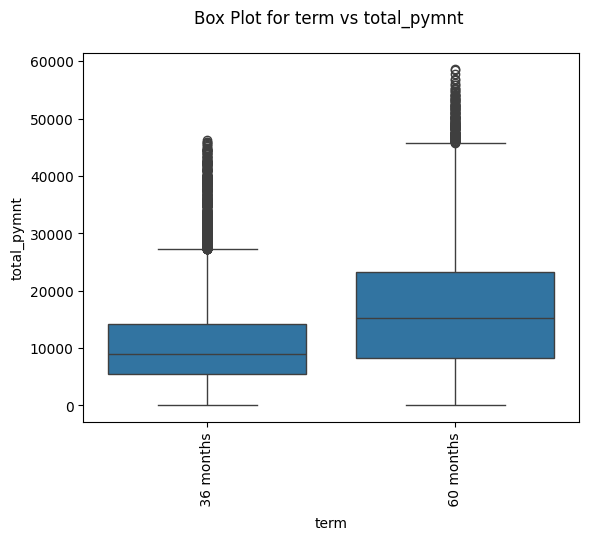

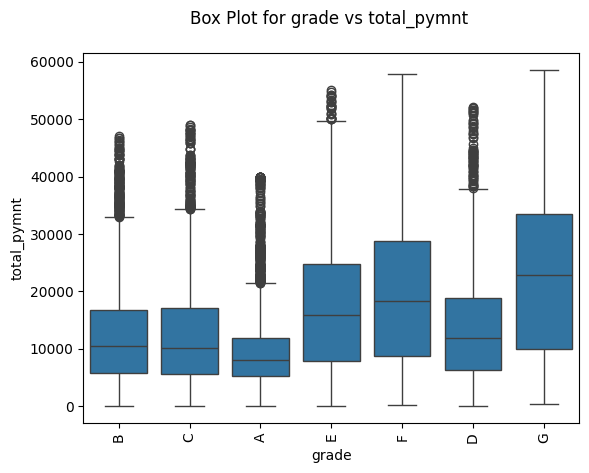

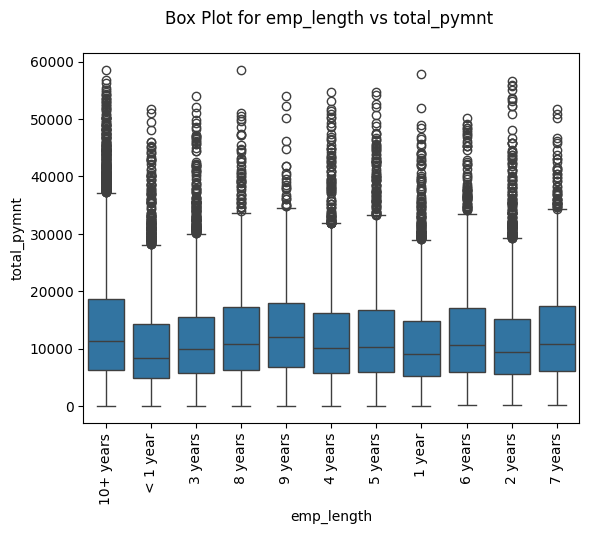

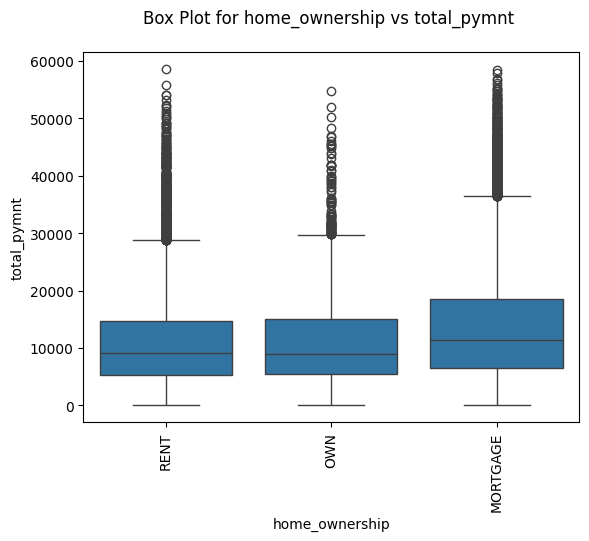

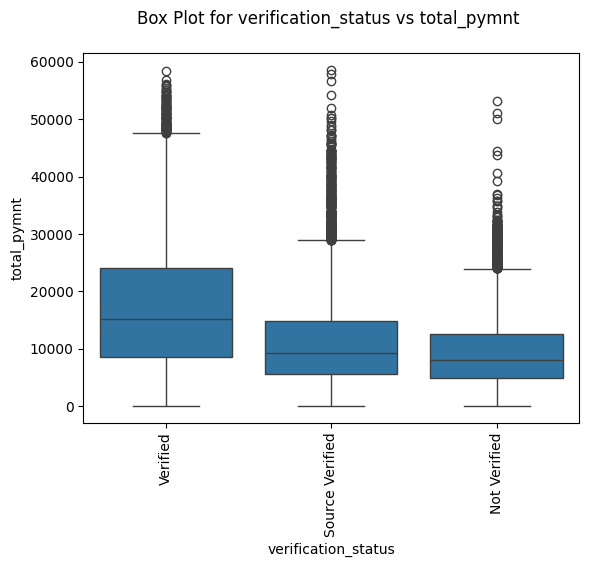

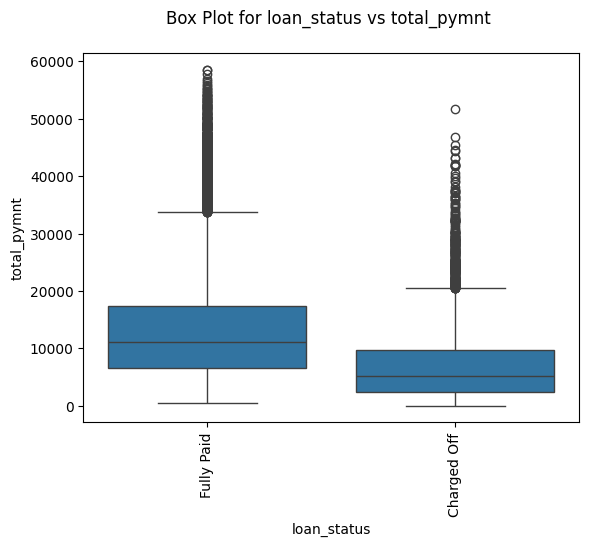

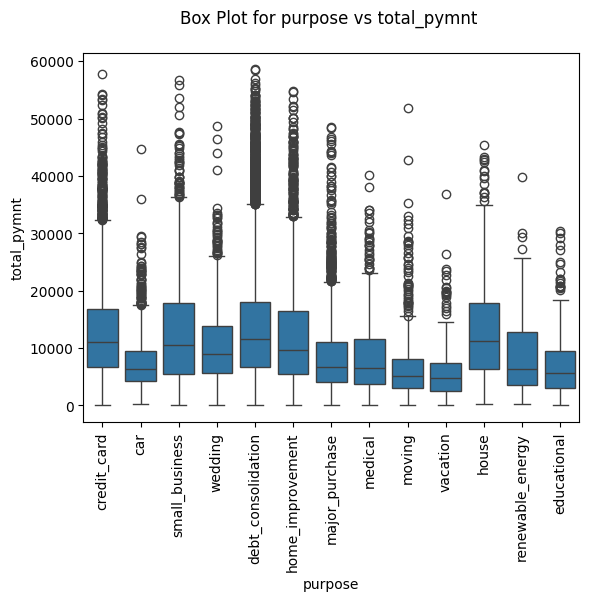

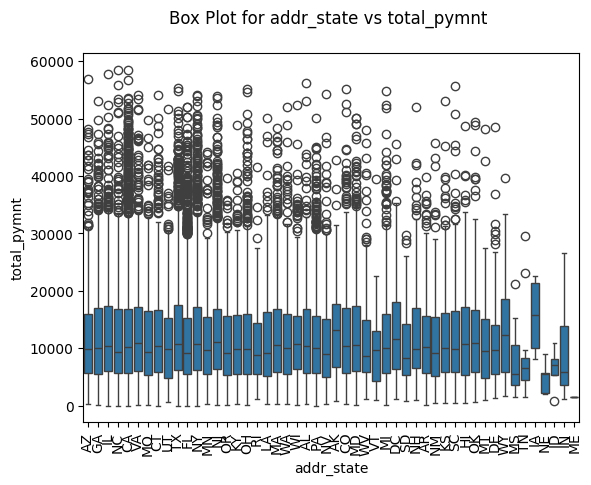

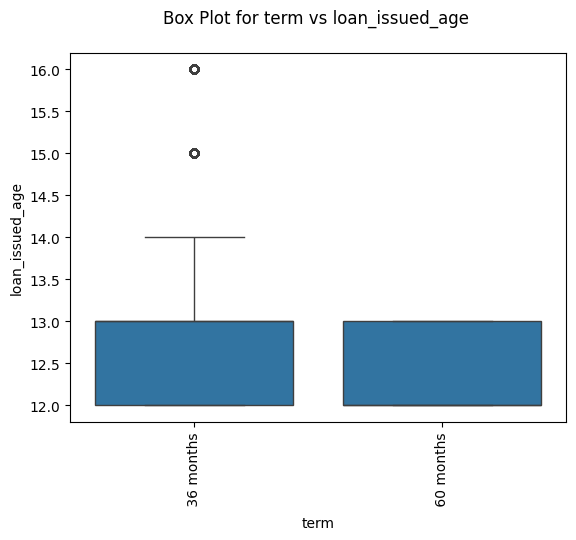

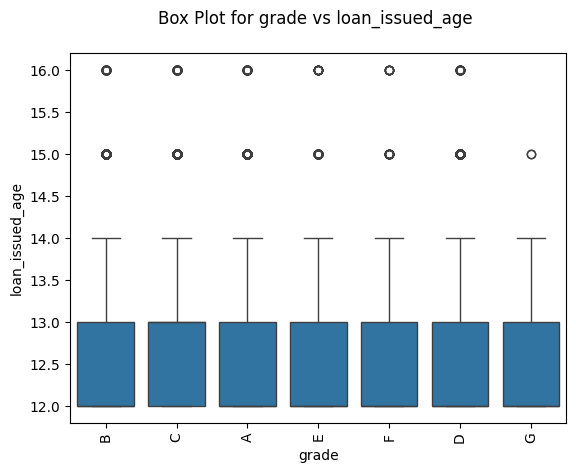

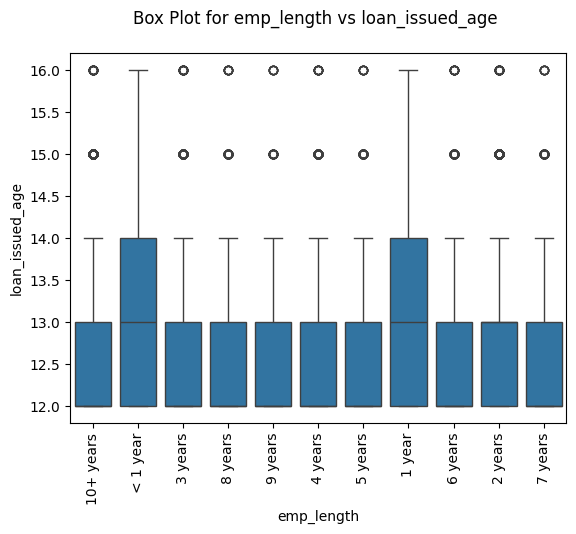

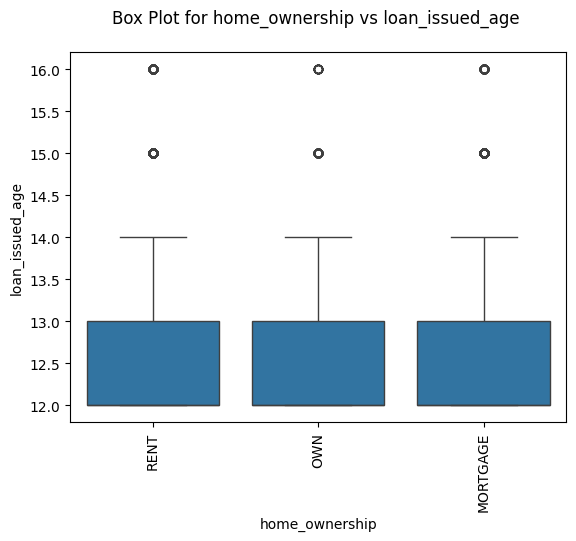

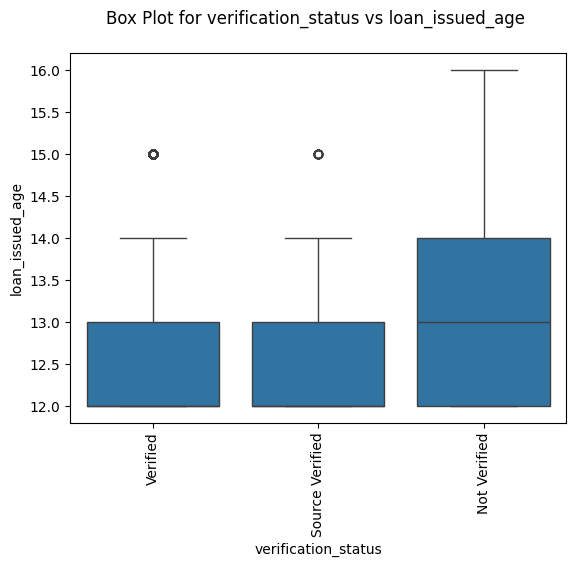

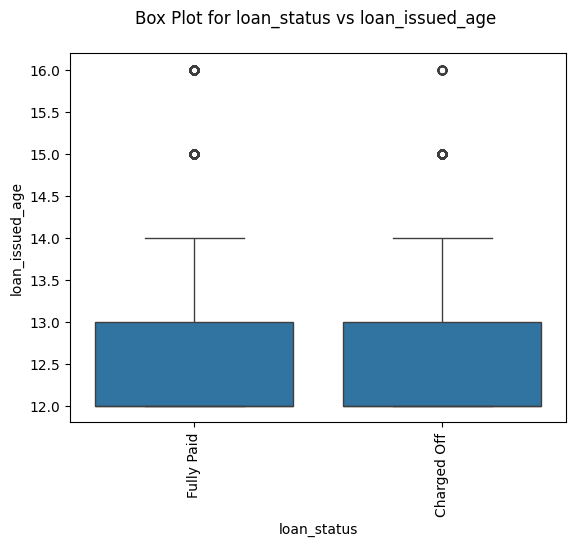

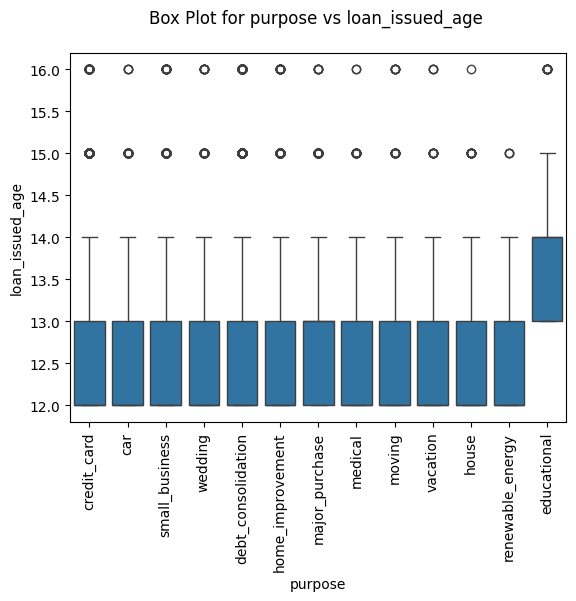

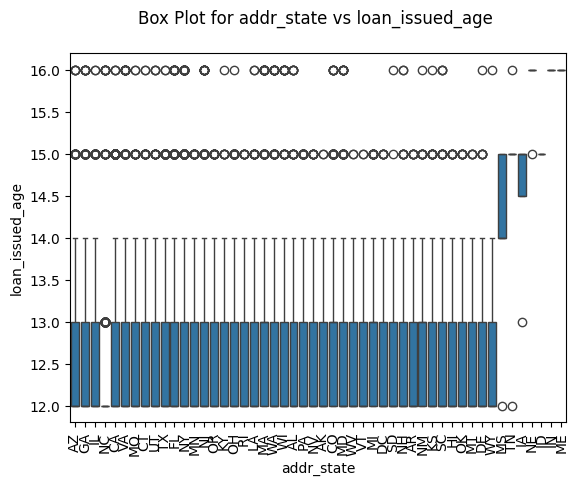

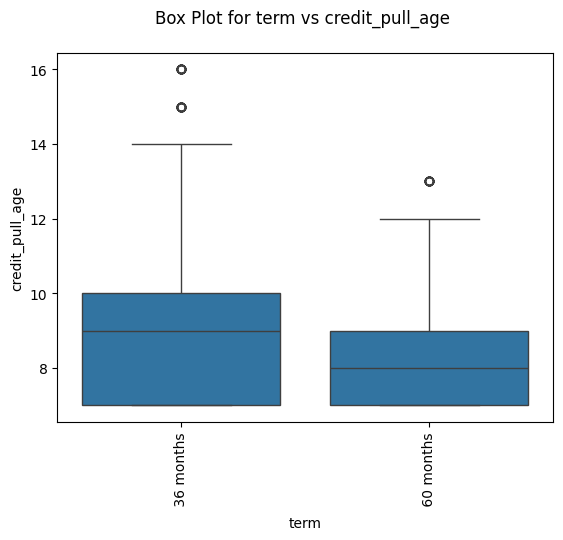

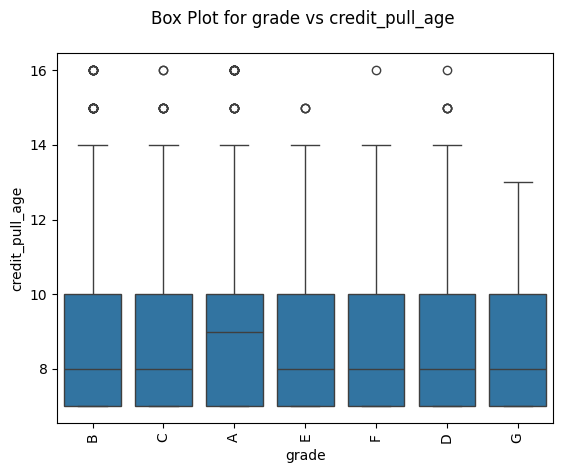

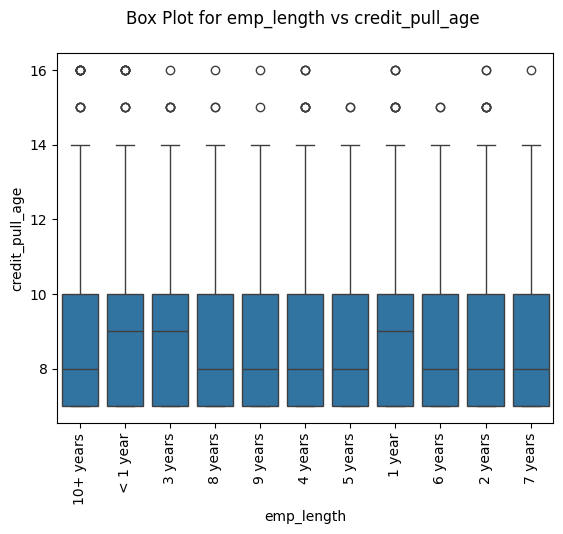

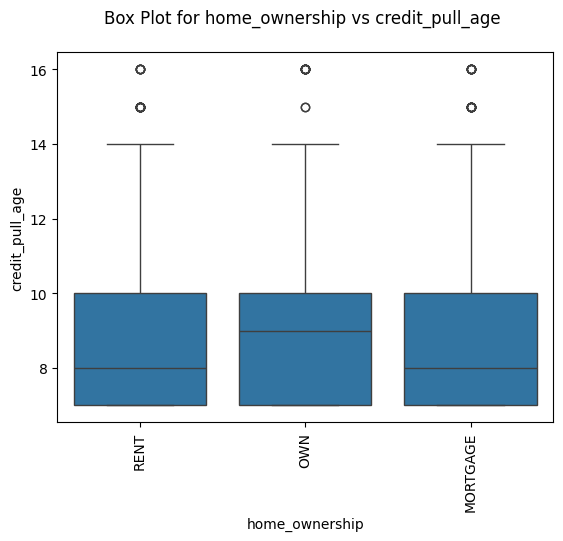

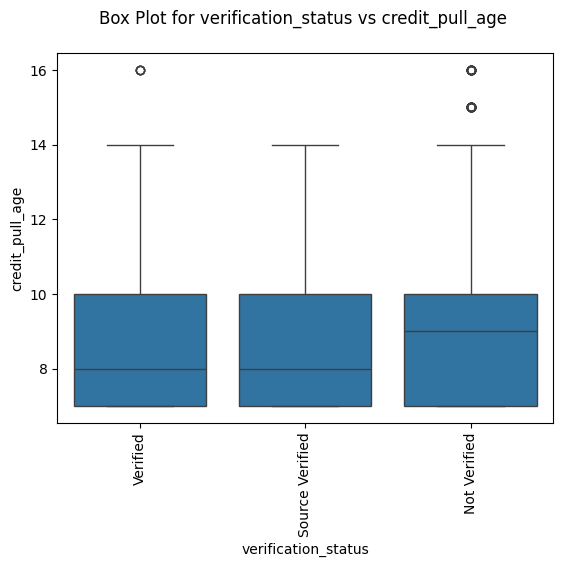

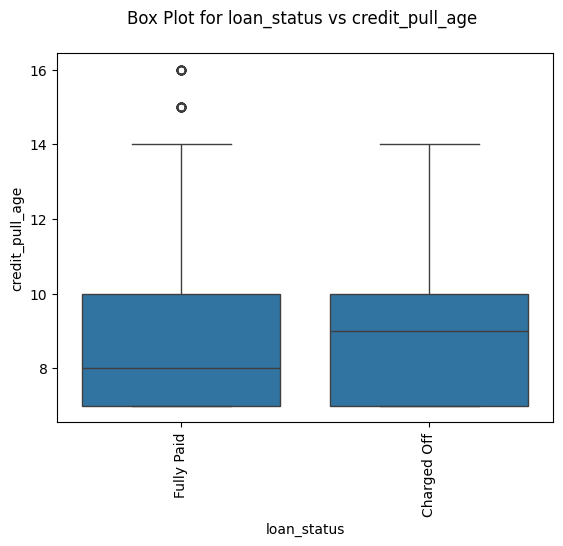

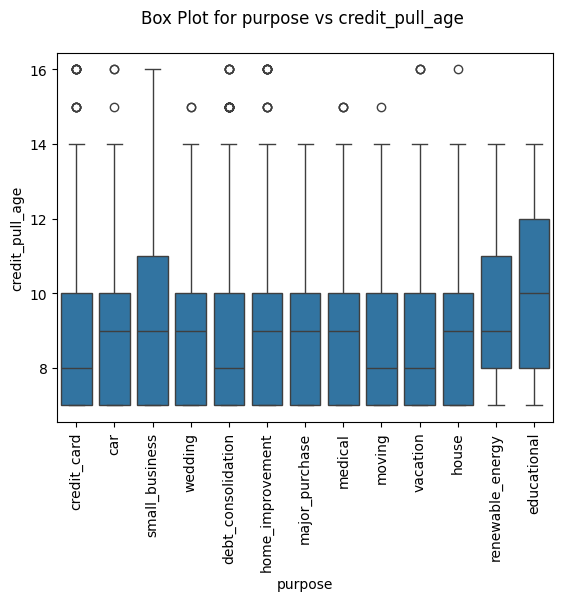

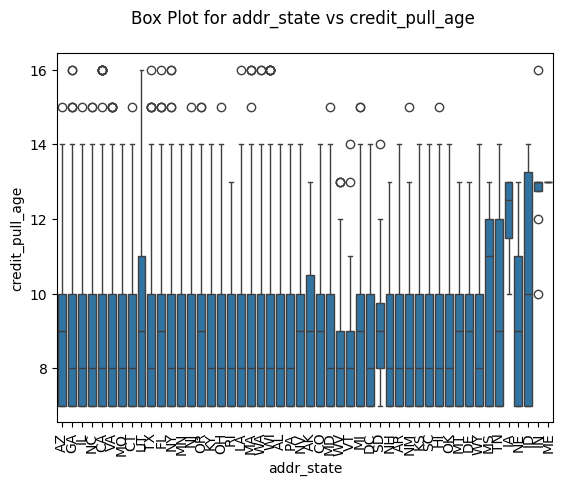

In [76]:
for p in numerical:
    for q in categorical:
        if p!= q:
            sns.boxplot(x=loan_df[q], y=loan_df[p])
            plt.title('Box Plot for '+q+' vs '+p+' \n')
            plt.xticks(rotation=90)
            plt.xlabel(q)
            plt.ylabel(p)
            plt.show()

In [ ]:
### loan_amnt vs term : people with 60 month term have taken more loan amount than 36 months term
### loan_amnt vs grade : people in grade G have taken minimum loan greater than any other grade
### loan_amnt vs employment_length : people with employment length 10+ years have taken highest loan amount 
### loan_amnt vs home_ownership : people in mortgage have taken higher loan amount
### loan_amnt vs verification_status : people with verified status have taken higher loan amount with min loan amount also higher than other min loan amounts
### loan_amnt vs purpose : people who wanted to do small business have taken higher loan amount next comes house purchase
### loan_amnt vs state : people from the state of NE have taken minimum loan amount less than all the other states.

### int_rate vs term: people in 60 months term are paying higher interest rate
### int_rate vs grade : people in grade A have taken least interest rate. people in grade G are paying highest interest rate
### int_rate vs verification_status: people who are verified are paying less interest rate
### int_rate vs purpose: people from small_business are paying higher max interest rates and min interest rates

### installment vs verification_status: people who are verified are paying more installments
### installment vs purpose: people who took house or small business are paying more installments
### installment vs grade: people from Grade G are paying highest number of installments

### issue_d vs purpose: educational loan is issued only between 2009 and 2010

### dti vs purpose: people who are paying credit card loan have higher debt to income ratio

### revol_util vs loan_status: people with status as charged off have slightly higher revol_util
### revol_util vs grade: people who fall udner grade A have lowest revolving ratio and grade G have the highest

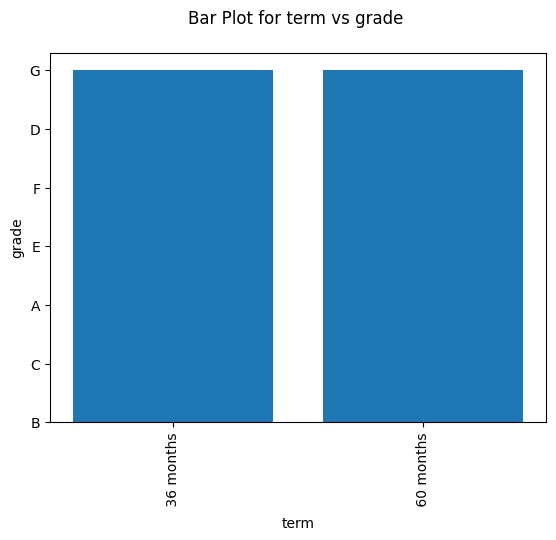

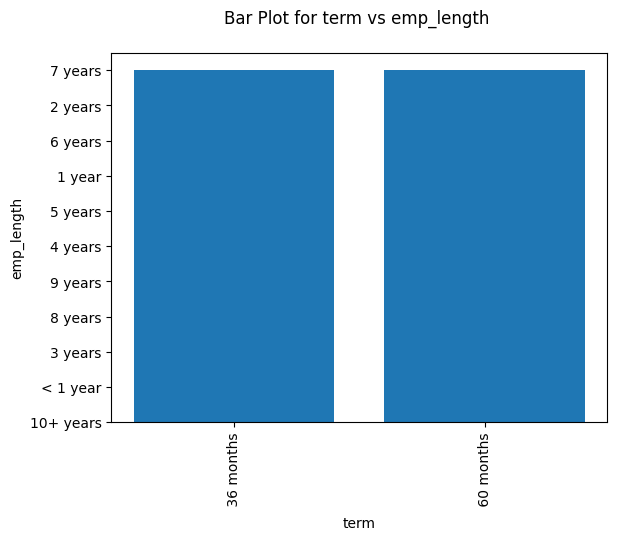

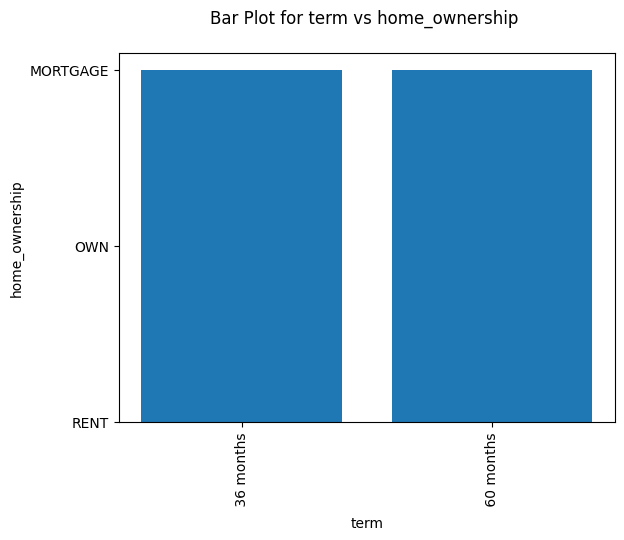

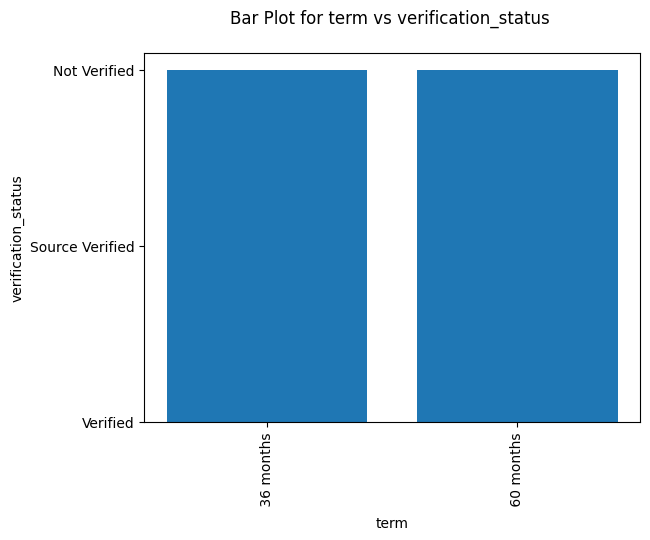

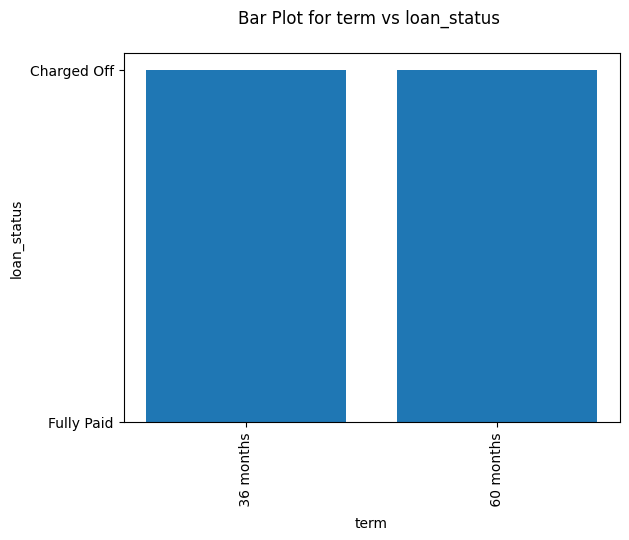

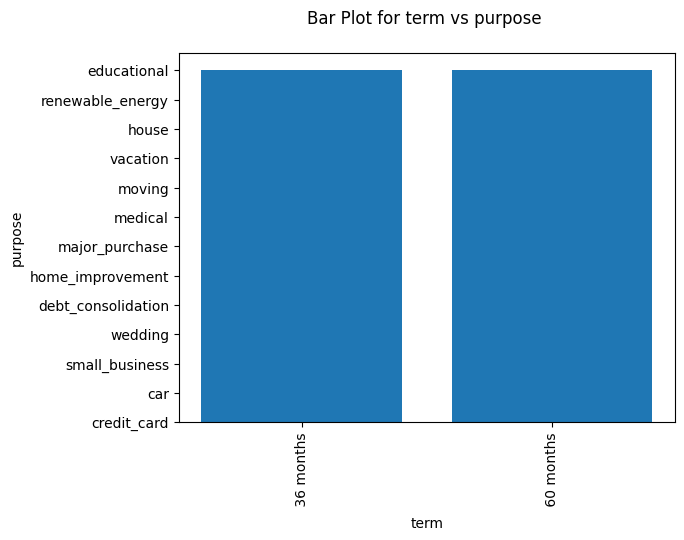

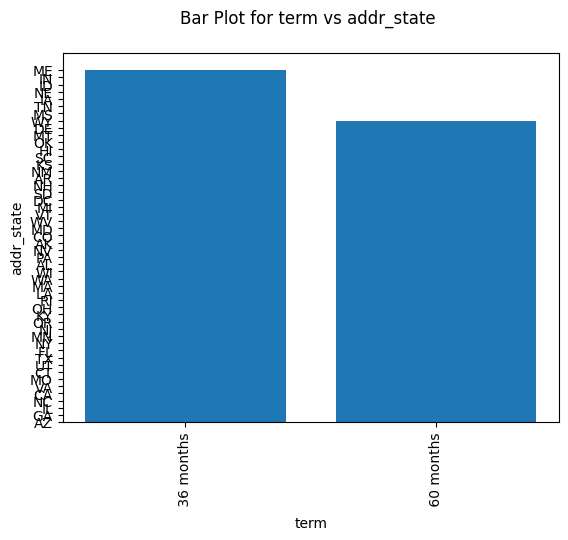

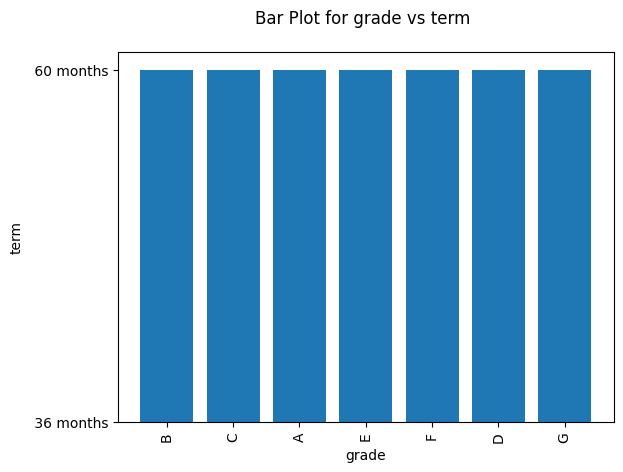

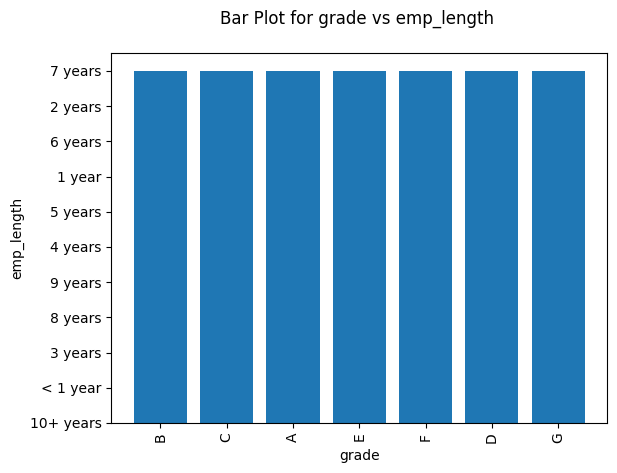

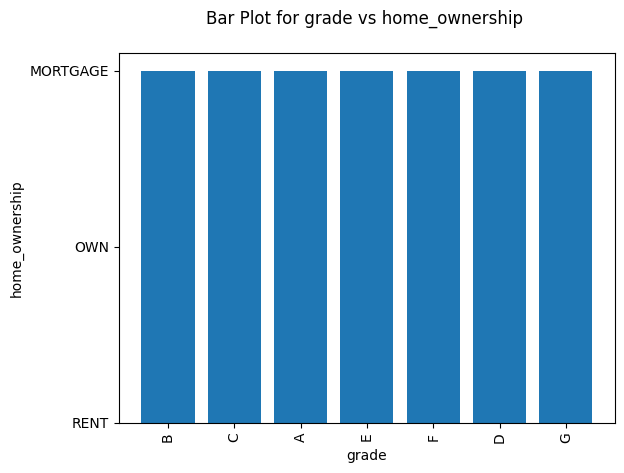

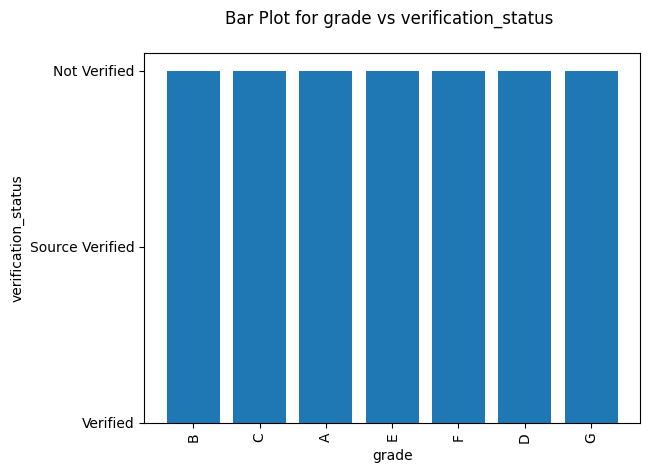

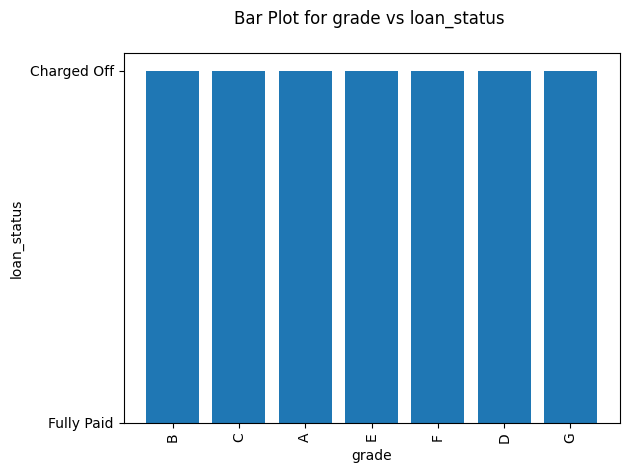

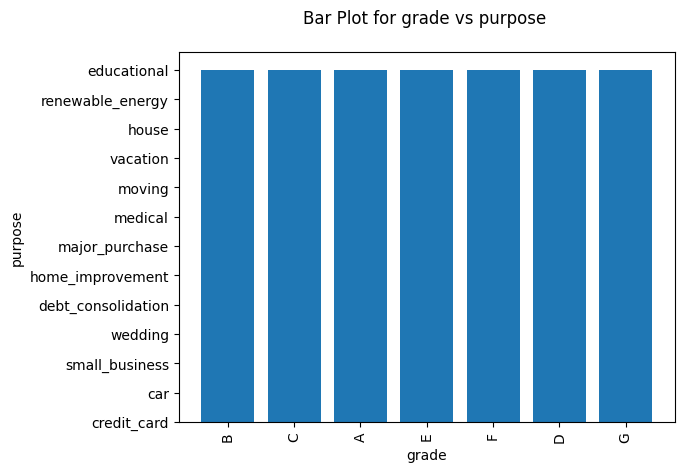

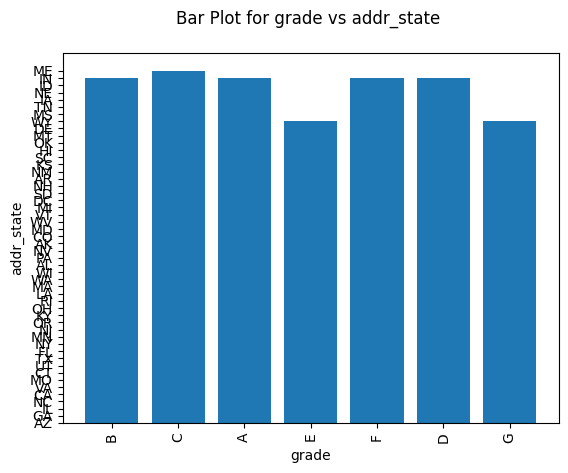

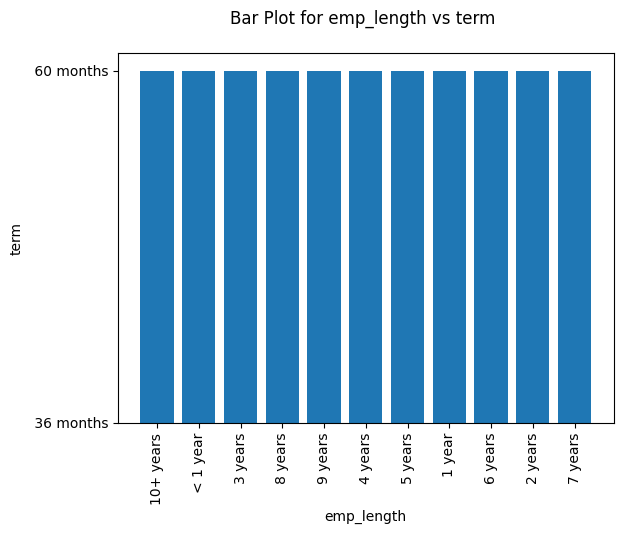

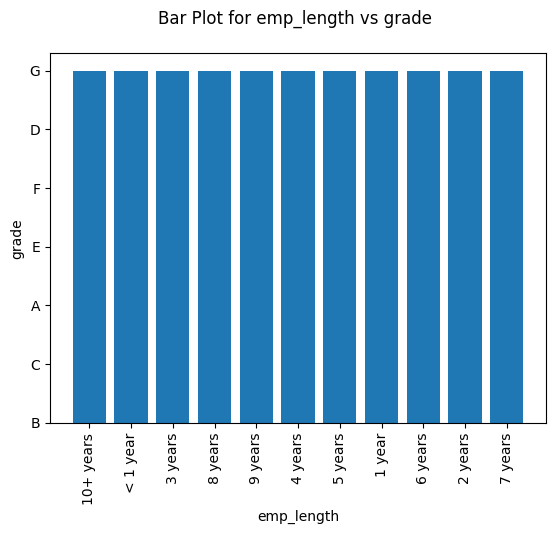

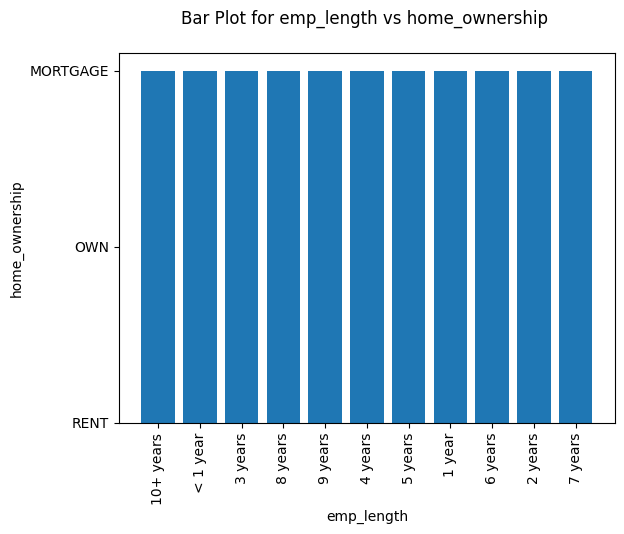

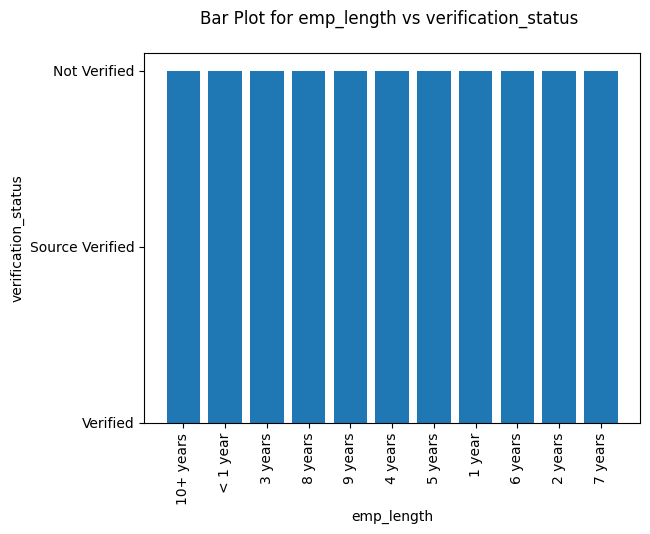

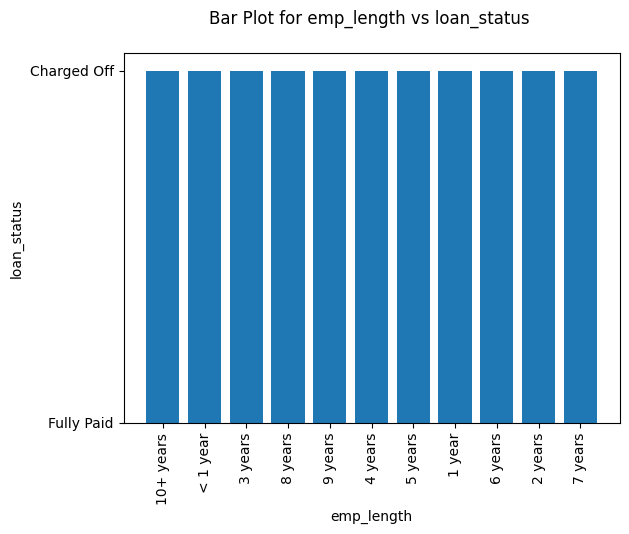

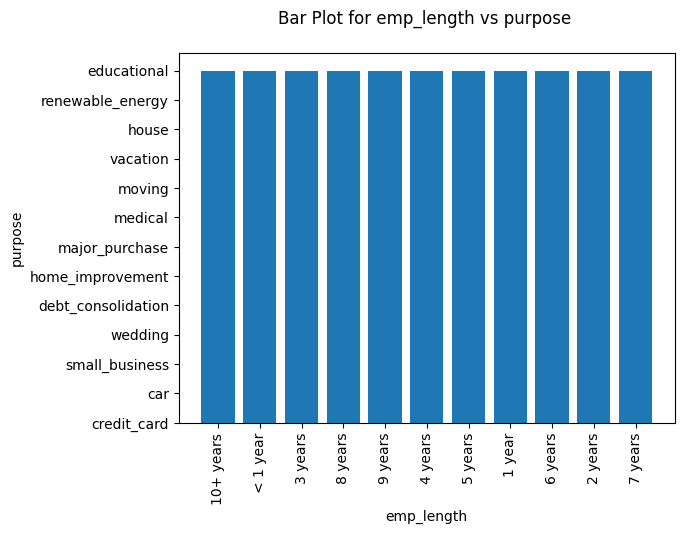

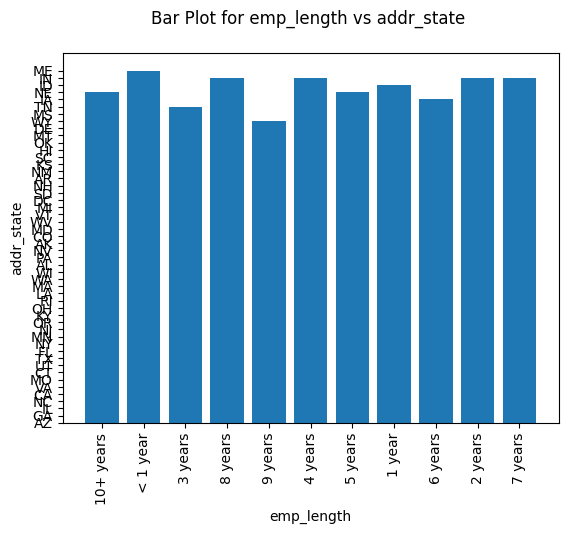

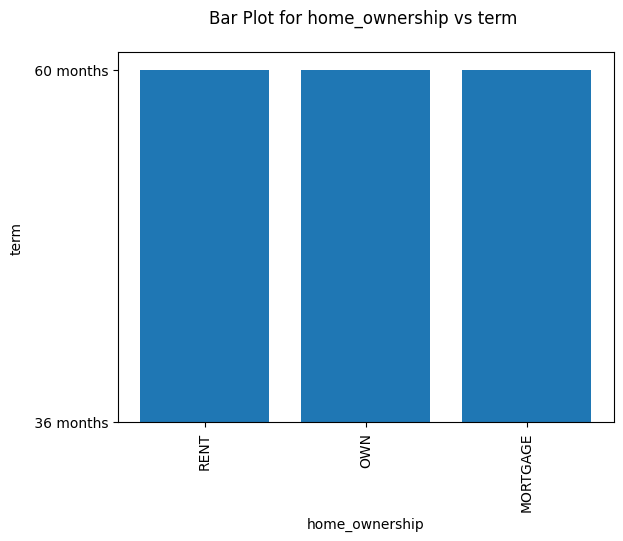

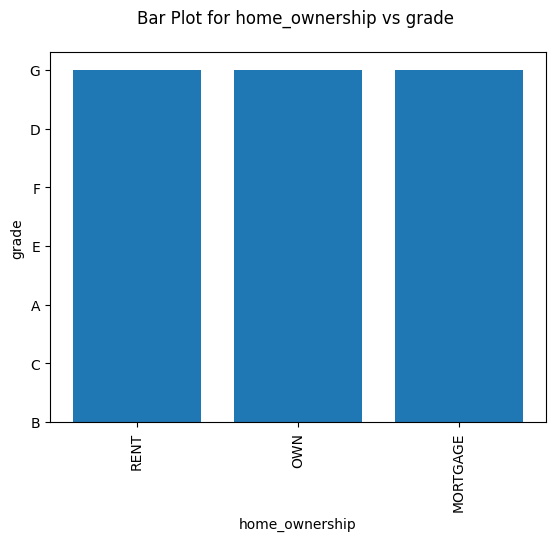

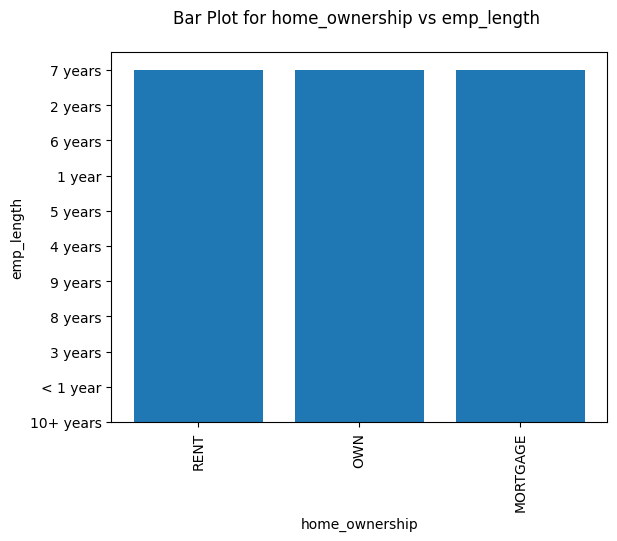

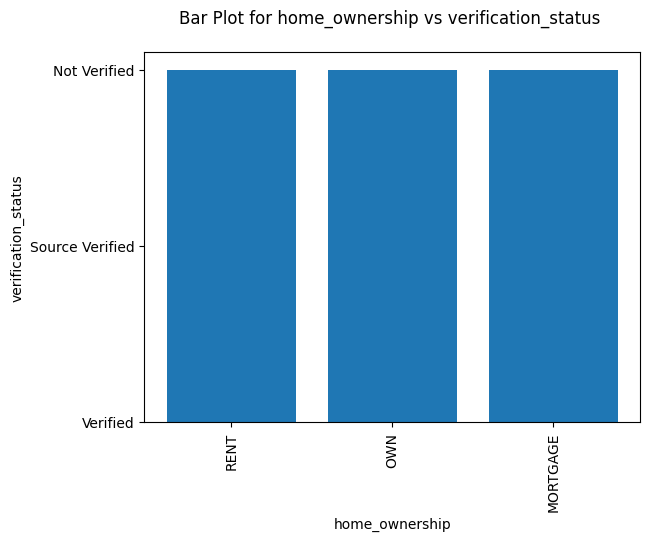

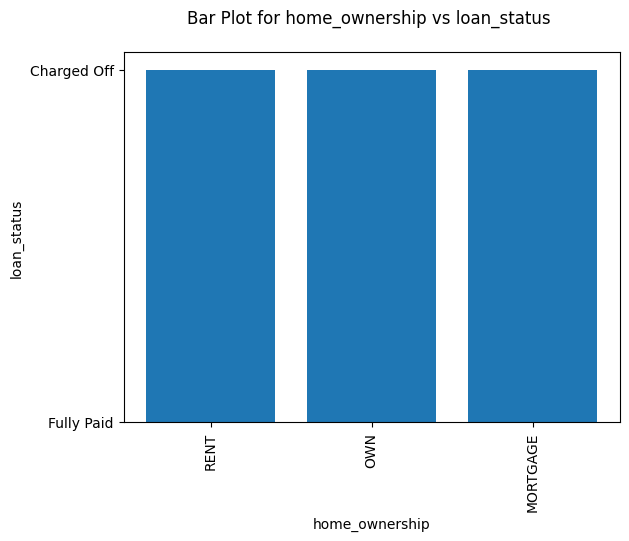

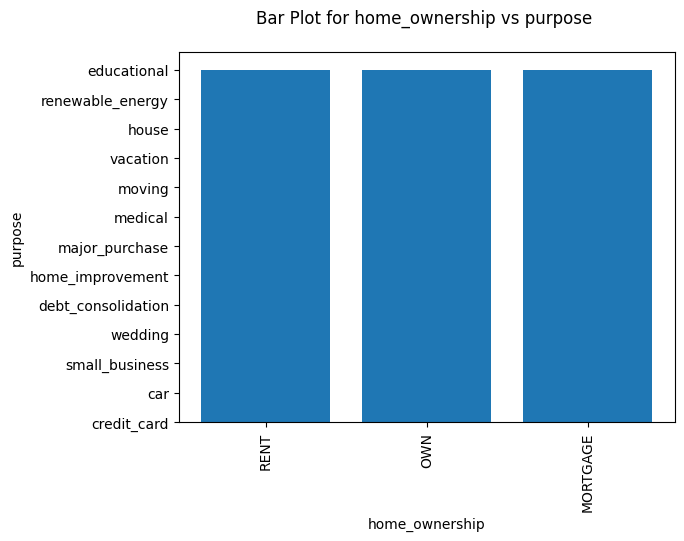

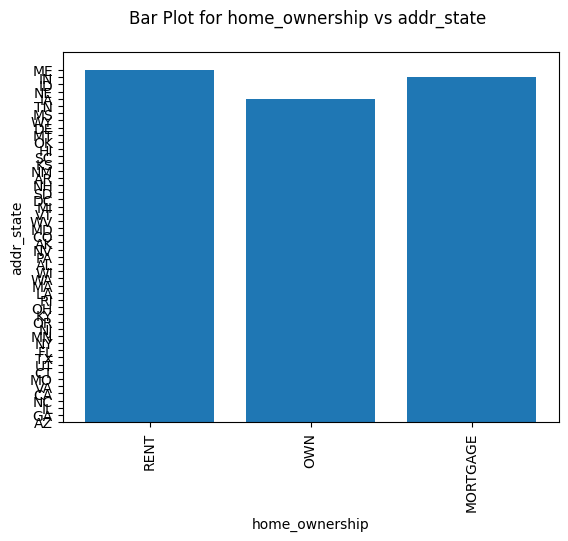

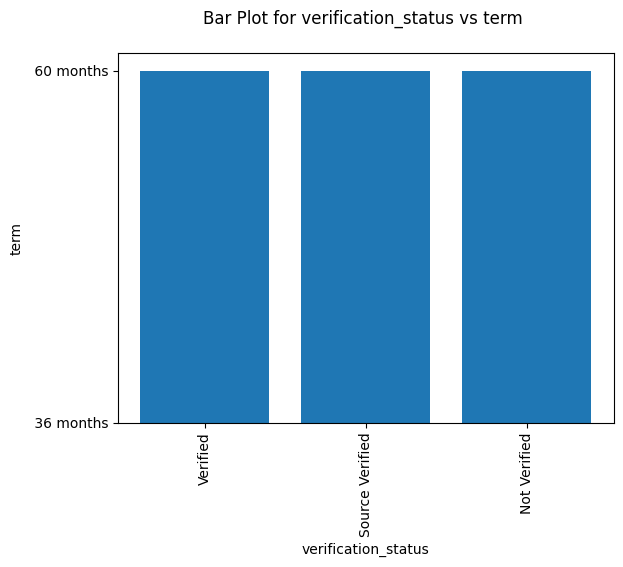

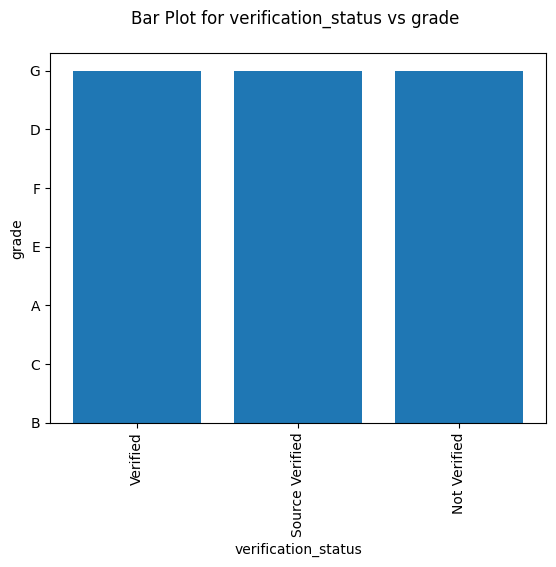

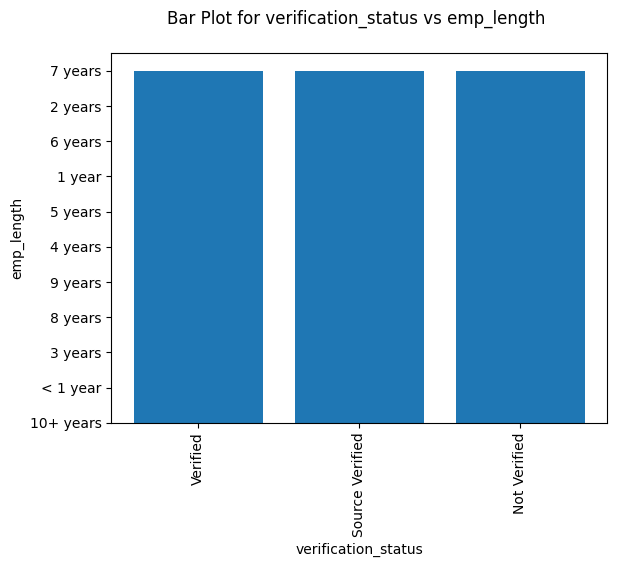

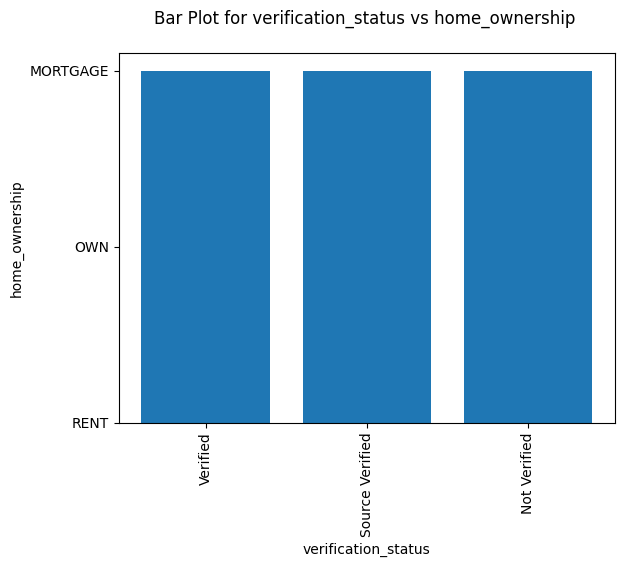

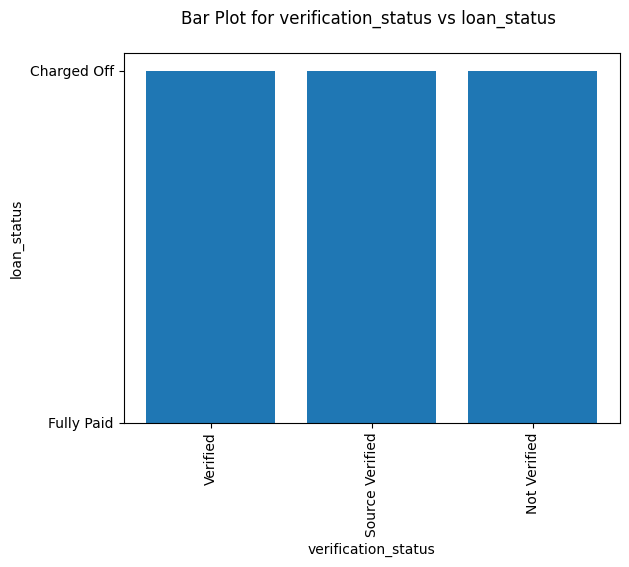

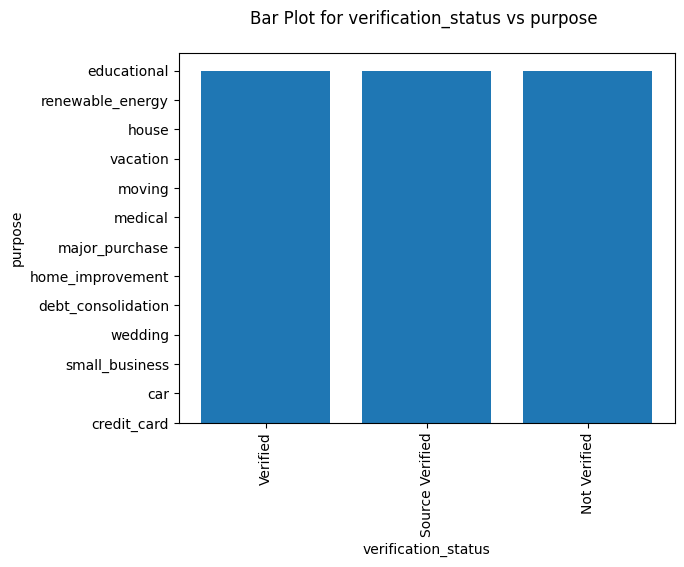

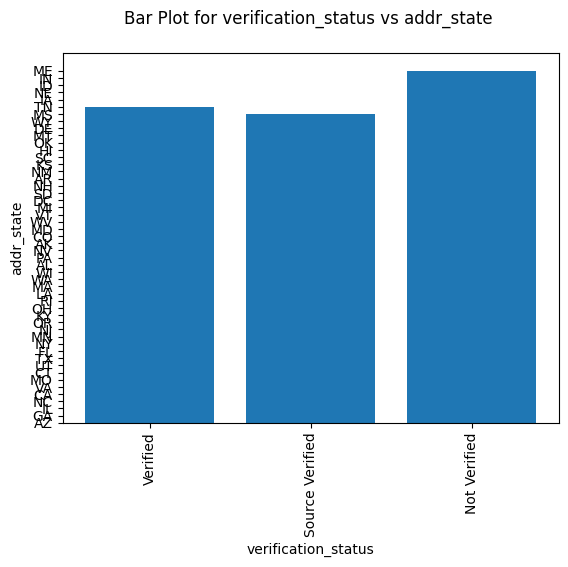

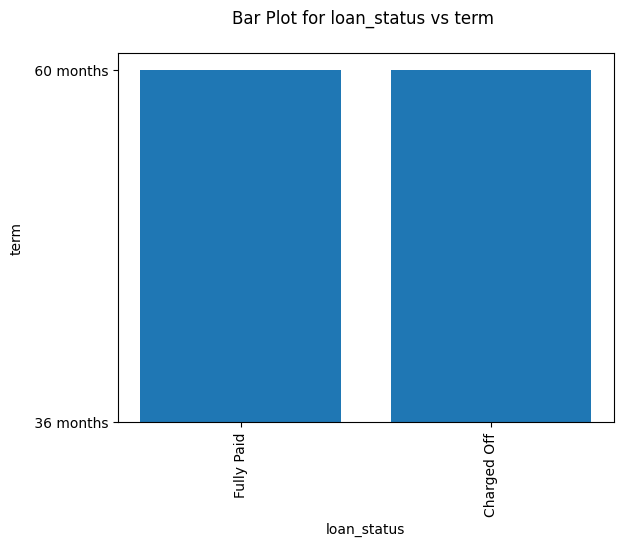

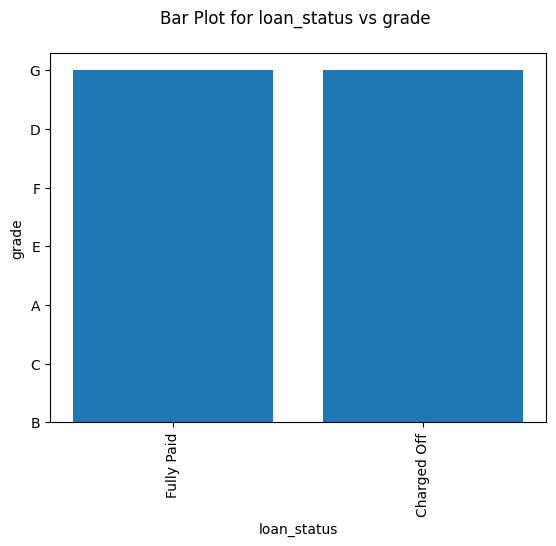

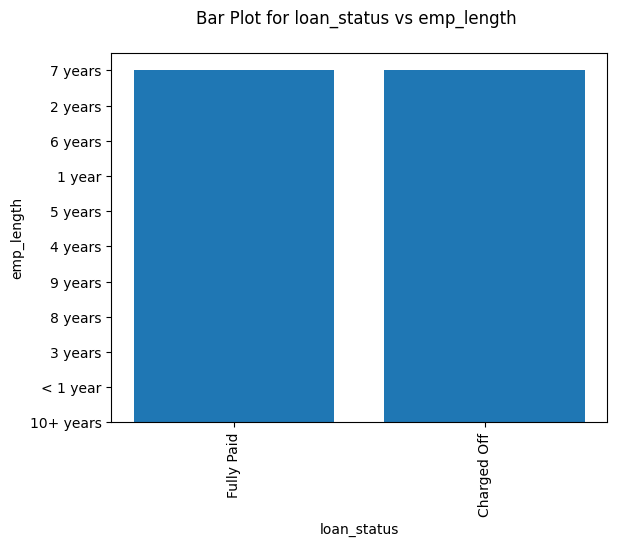

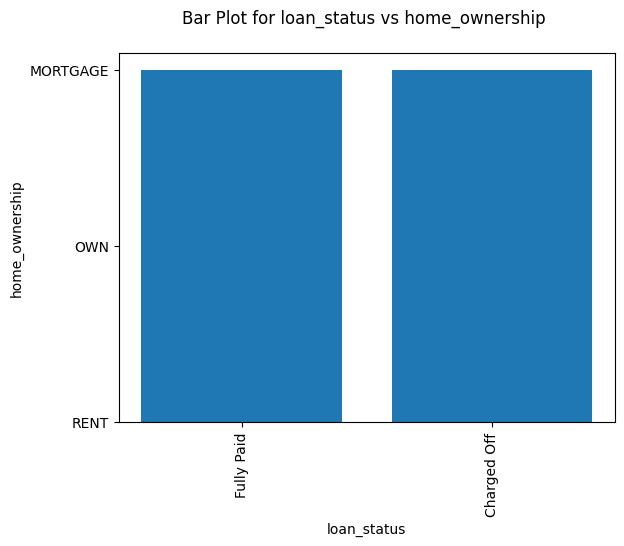

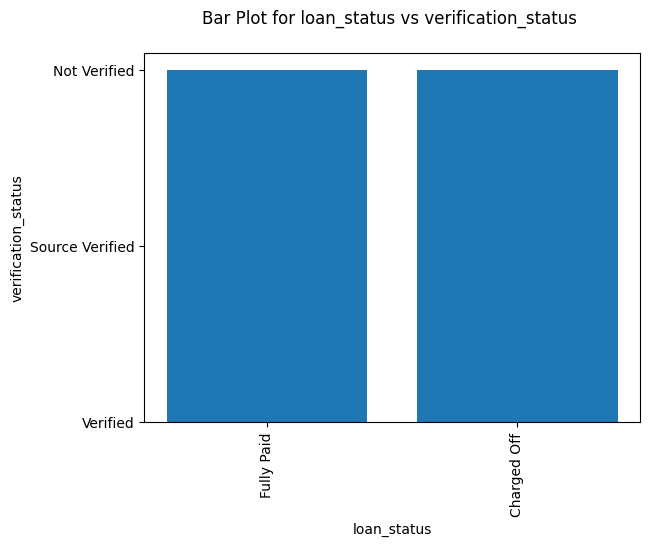

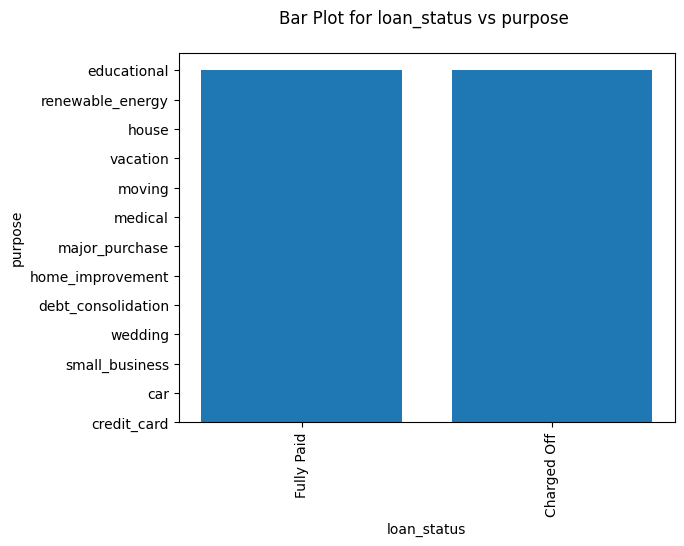

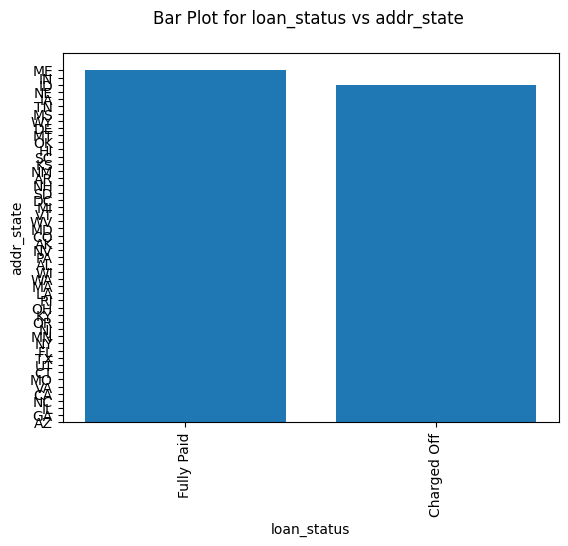

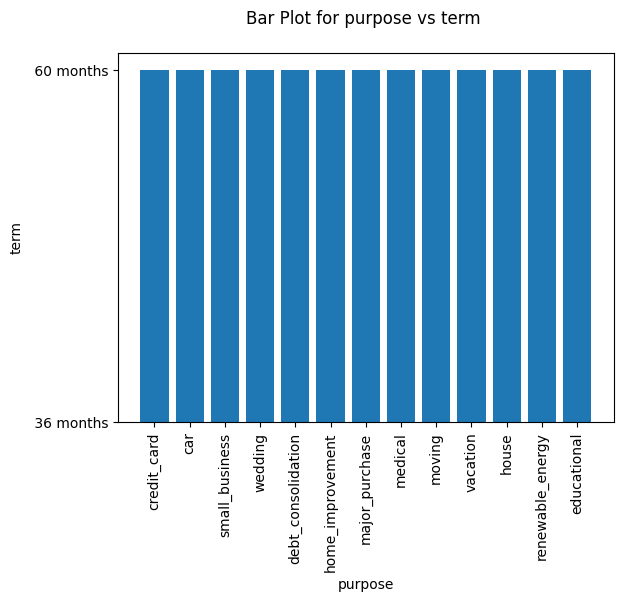

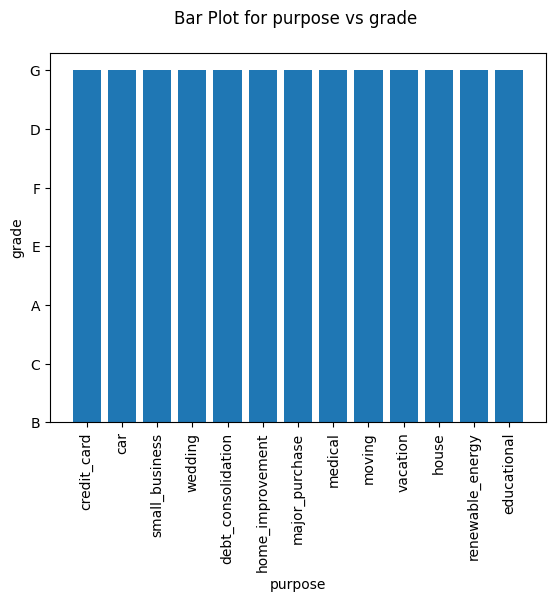

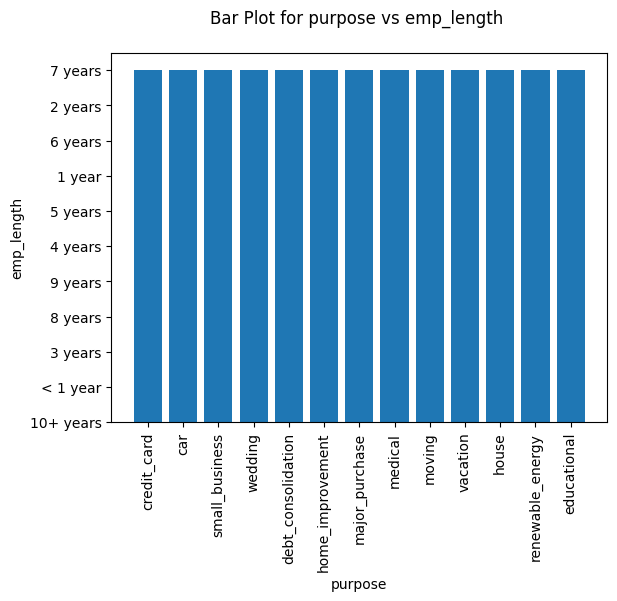

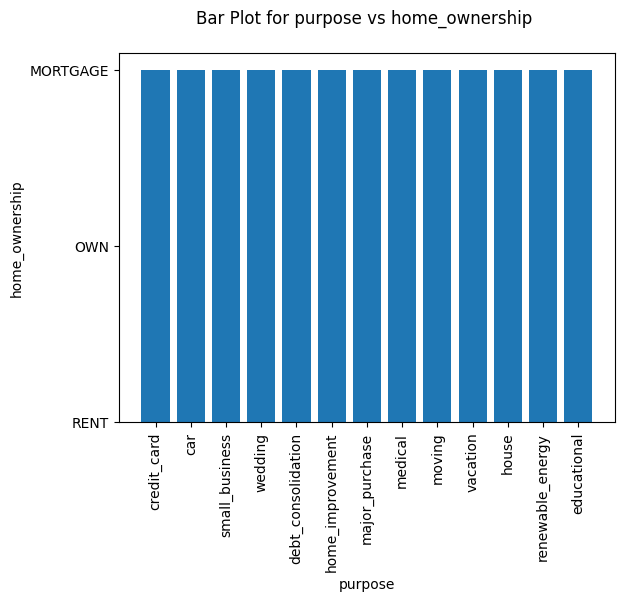

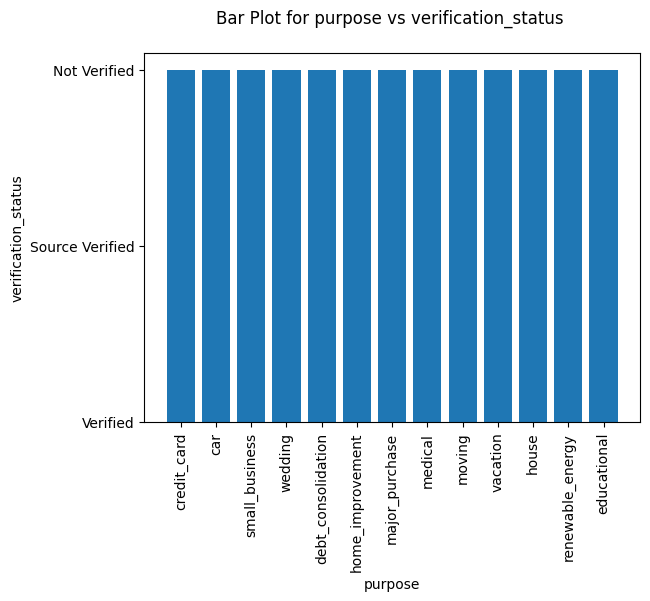

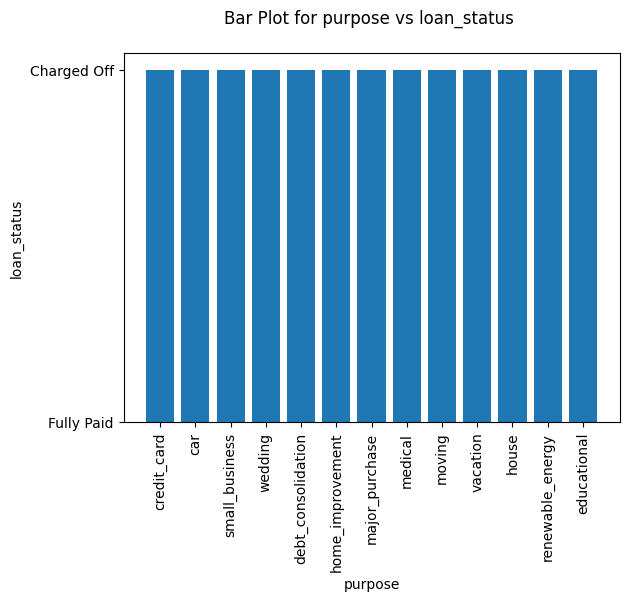

In [ ]:
for p in categorical:
    for q in categorical:
        if p!= q:
            plt.bar(loan_df[p], loan_df[q])
            plt.title('Bar Plot for '+p+' vs '+q+' \n')
            plt.xticks(rotation=90)
            plt.xlabel(p)
            plt.ylabel(q)
            plt.show()

### grade vs delinq_2yrs: people in grade B have highest delinq_2yrs
### employee_length vs delinq_2yrs: people with employee_length as 5 years have highest delinq_2yrs
### home_ownership vs delinq_2yrs: Renters have higher delinq_2yrs
### home_ownership vs pub_rec: Mortgage people have high pub_rec
### home_ownership vs pub_rec_bankruptcies: owners have the least pub_rec_bankruptcies

<Axes: title={'center': 'Heat map for multi variate analysis'}>

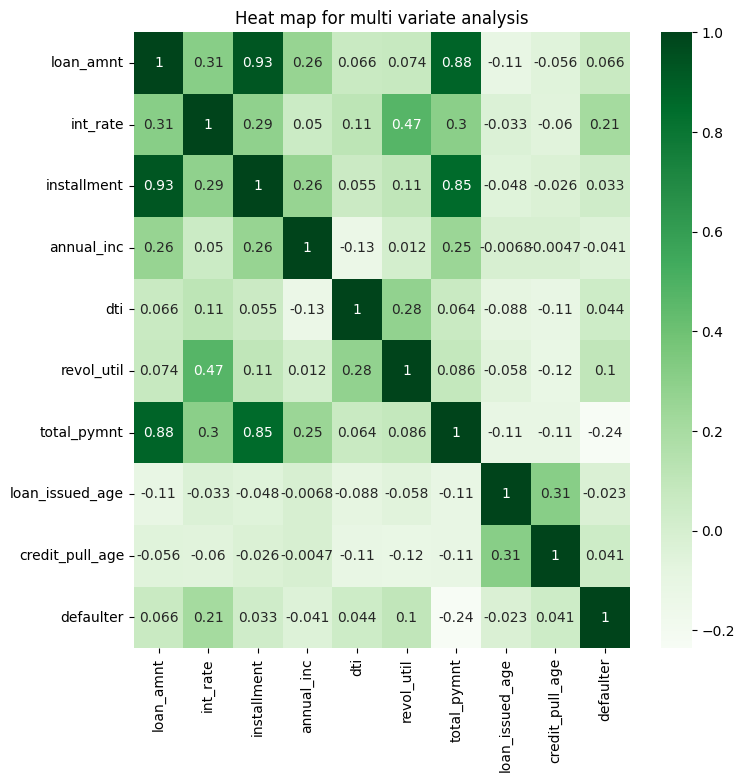

In [106]:
### Multivariate analysis
loan_df['defaulter'] = loan_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.replace(' months', '')))
numerical.append('defaulter')
new_df = loan_df[numerical]
plt.figure(figsize = (8, 8))
plt.title('Heat map for multi variate analysis')
sns.heatmap(new_df.corr(), cmap='Greens', annot=True)

In [ ]:
## Analysis
# loan amount and number of installments are highly correlated.
# 